In [1]:
import time
import random
import numpy as np
import importlib

import sys
sys.path.append("../../")

In [2]:
from qiskit import QuantumProgram
import Qconfig

In [3]:
import tools.Experiment_tools as exptool
import tools.Ploting_tools as plottool

In [4]:
importlib.reload(exptool)
importlib.reload(plottool)

<module 'tools.Ploting_tools' from '/Users/cvuillot/Work/Programming/IBMQE/qiskit-sdk-py/examples/experimenting_with_fault_tolerance/tools/Ploting_tools.py'>

In [5]:
qprogram = QuantumProgram()
qprogram.set_api(Qconfig.APItoken, Qconfig.config["url"])

In [6]:
api = qprogram.get_api()

In [7]:
qprogram.available_backends()

['ibmqx4',
 'ibmqx2',
 'ibmqx5',
 'ibmqx_qasm_simulator',
 'local_qasm_simulator',
 'local_unitary_simulator']

In [8]:
print(qprogram.get_backend_status("ibmqx4"))
api.get_my_credits()

{'available': True, 'busy': False, 'pending_jobs': 4, 'backend': 'ibmqx4'}


{'maxUserType': 150, 'promotional': 100, 'remaining': 150}

In [9]:
config = qprogram.get_backend_configuration("ibmqx4",list_format=True)
config

{'basis_gates': 'SU2+CNOT',
 'chip_name': 'Raven',
 'coupling_map': [[1, 0], [2, 0], [2, 1], [2, 4], [3, 2], [3, 4]],
 'description': '5 qubit transmon bowtie chip 3',
 'n_qubits': 5,
 'name': 'ibmqx4',
 'online_date': '2017-09-18T11:00:00.000Z',
 'simulator': False,
 'url': 'https://ibm.biz/qiskit-ibmqx4',
 'version': '1'}

In [10]:
n = config['n_qubits']
q = qprogram.create_quantum_register("q",n)
c = qprogram.create_classical_register("c",n)

In [11]:
circuit_names = exptool.all_circuits(qprogram,config['coupling_map'])

In [12]:
rand_perm_names = np.random.permutation(circuit_names)
batches = [list(rand_perm_names[50*j:50*(j+1)]) for j in range(0,1+int(len(circuit_names)/50))]

compiled_qobj_list = [qprogram.compile(batch, 
                                       backend='ibmqx4', 
                                       config=None,
                                       silent=False, 
                                       basis_gates=None, 
                                       coupling_map=None, 
                                       initial_layout=None, 
                                       shots=8192, 
                                       max_credits=5, 
                                       seed=None) for batch in batches]

In [49]:
qprogram.run_batch_async(compiled_qobj_list, wait=2, timeout=6, silent=True, callback=exptool.post_treatment_list)

In [13]:
print(qprogram.get_backend_status("ibmqx4"))
api.get_my_credits()

{'available': True, 'busy': False, 'pending_jobs': 4, 'backend': 'ibmqx4'}


{'maxUserType': 150, 'promotional': 100, 'remaining': 150}

In [14]:
print(exptool.fetch_previous('timed_out.txt',api))
print(exptool.fetch_previous('completed.txt',api))

0
0


In [15]:
dict_cn = exptool.get_qasm_name_dict(compiled_qobj_list)

In [16]:
print(exptool.process_all_api_dumps('data/completed_timed_out.txt','data/already_processed.txt',dict_cn))
print(exptool.process_all_api_dumps('data/completed_completed.txt','data/already_processed.txt',dict_cn))
print(exptool.process_all_api_dumps('data/completed_timed_out_old.txt','data/already_processed.txt',dict_cn))

0
0
0


In [17]:
importlib.reload(exptool)
importlib.reload(plottool)
import matplotlib
matplotlib.rcParams.update({'font.size': 22})

In [18]:
#exptool.plot_everything_raw('data/Processed_data/')

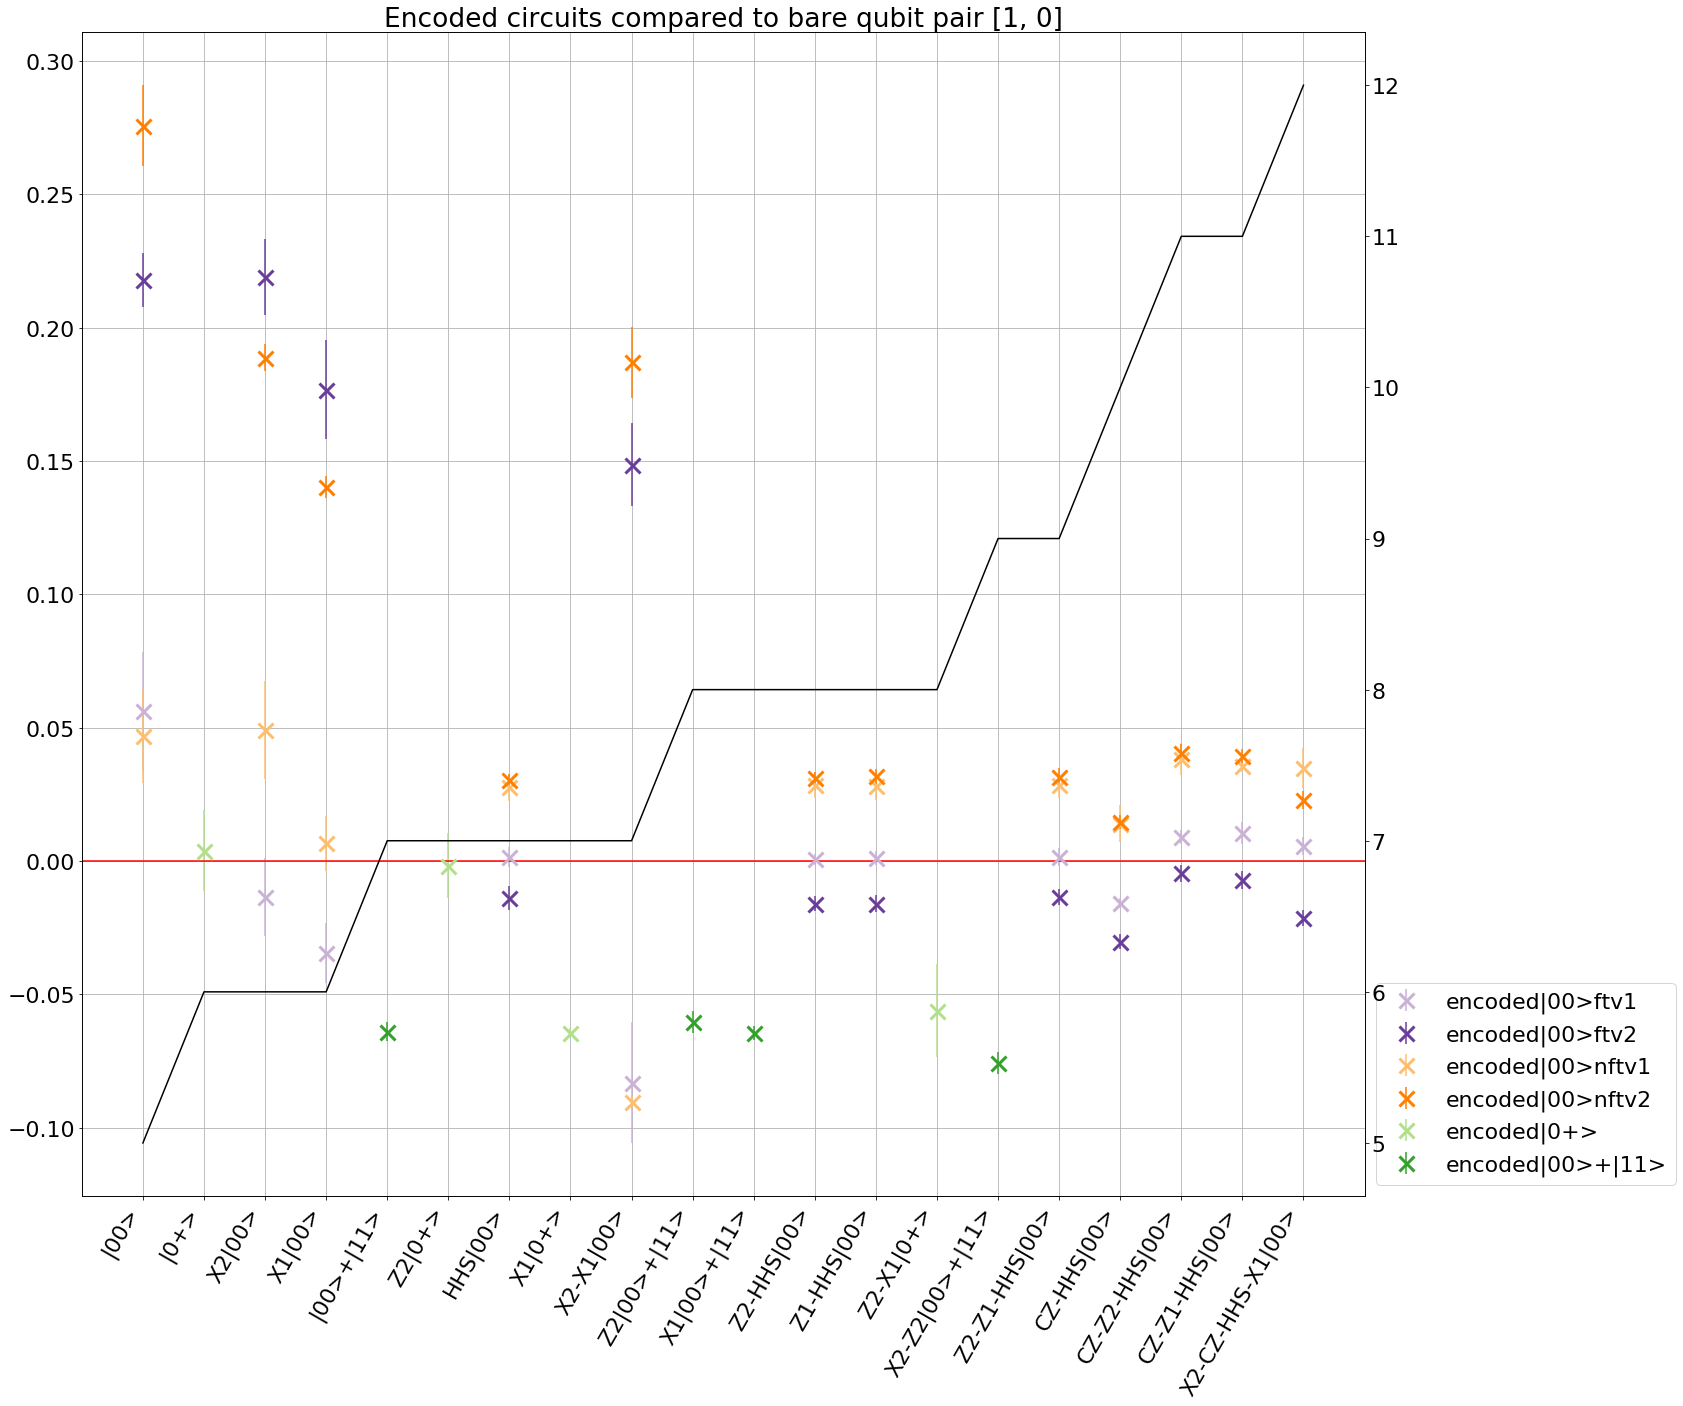

0 27398
bare[1, 0] 0.0672178879495609
bare[2, 0] 0.055036253140751126
bare[2, 1] 0.0648934692934251
bare[2, 4] 0.06984813141108422
bare[3, 2] 0.06273241831836669
bare[3, 4] 0.07725998894284998


In [19]:
plottool.plot_everything_averaged_diff('data/Processed_data/', 
                                 logscaley=False,
                                 bareindex=0,
                                 ci=.99)

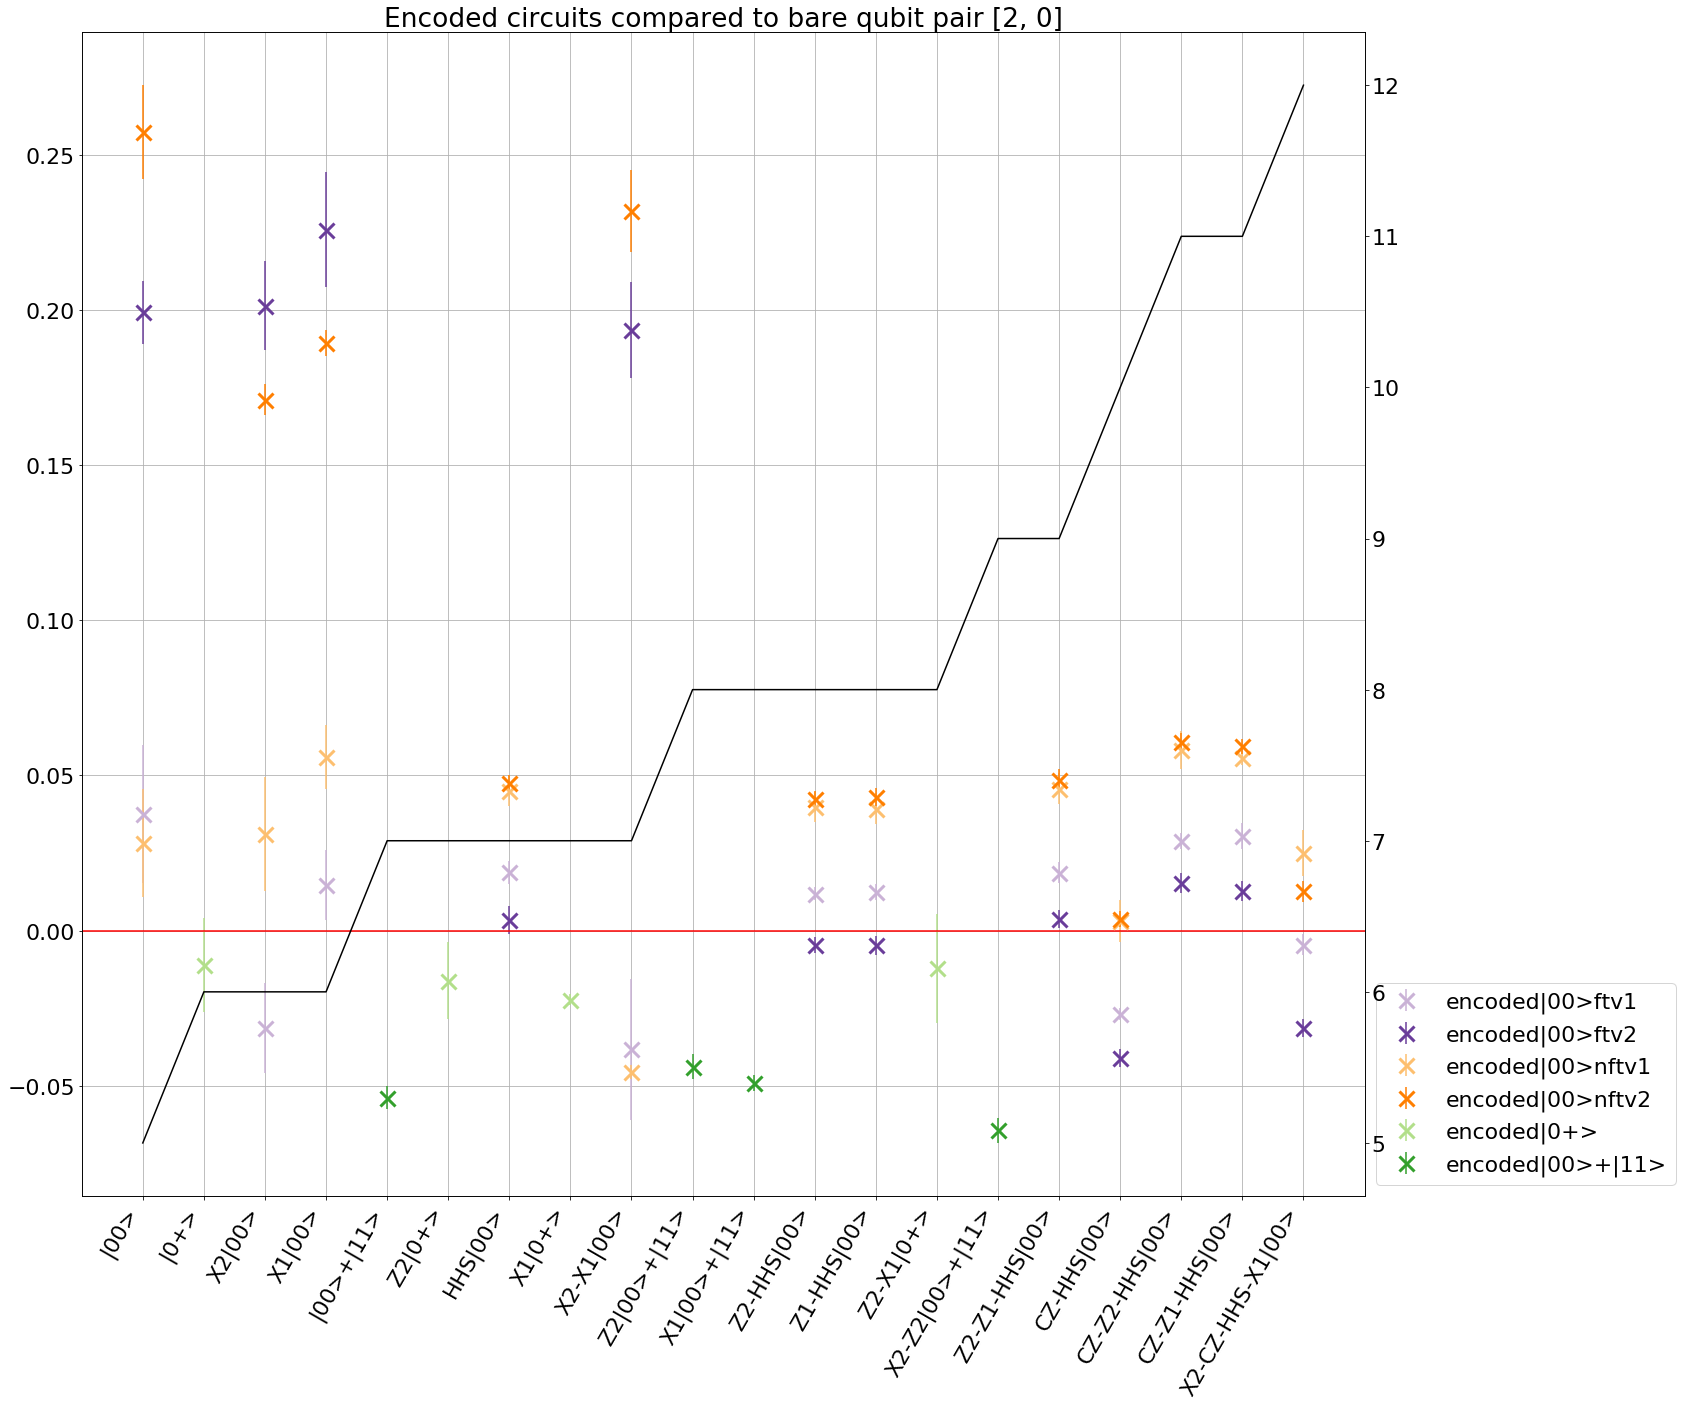

0 27398
bare[1, 0] 0.0672178879495609
bare[2, 0] 0.055036253140751126
bare[2, 1] 0.0648934692934251
bare[2, 4] 0.06984813141108422
bare[3, 2] 0.06273241831836669
bare[3, 4] 0.07725998894284998


In [20]:
plottool.plot_everything_averaged_diff('data/Processed_data/', 
                                 logscaley=False,
                                 bareindex=1,
                                 ci=.99)

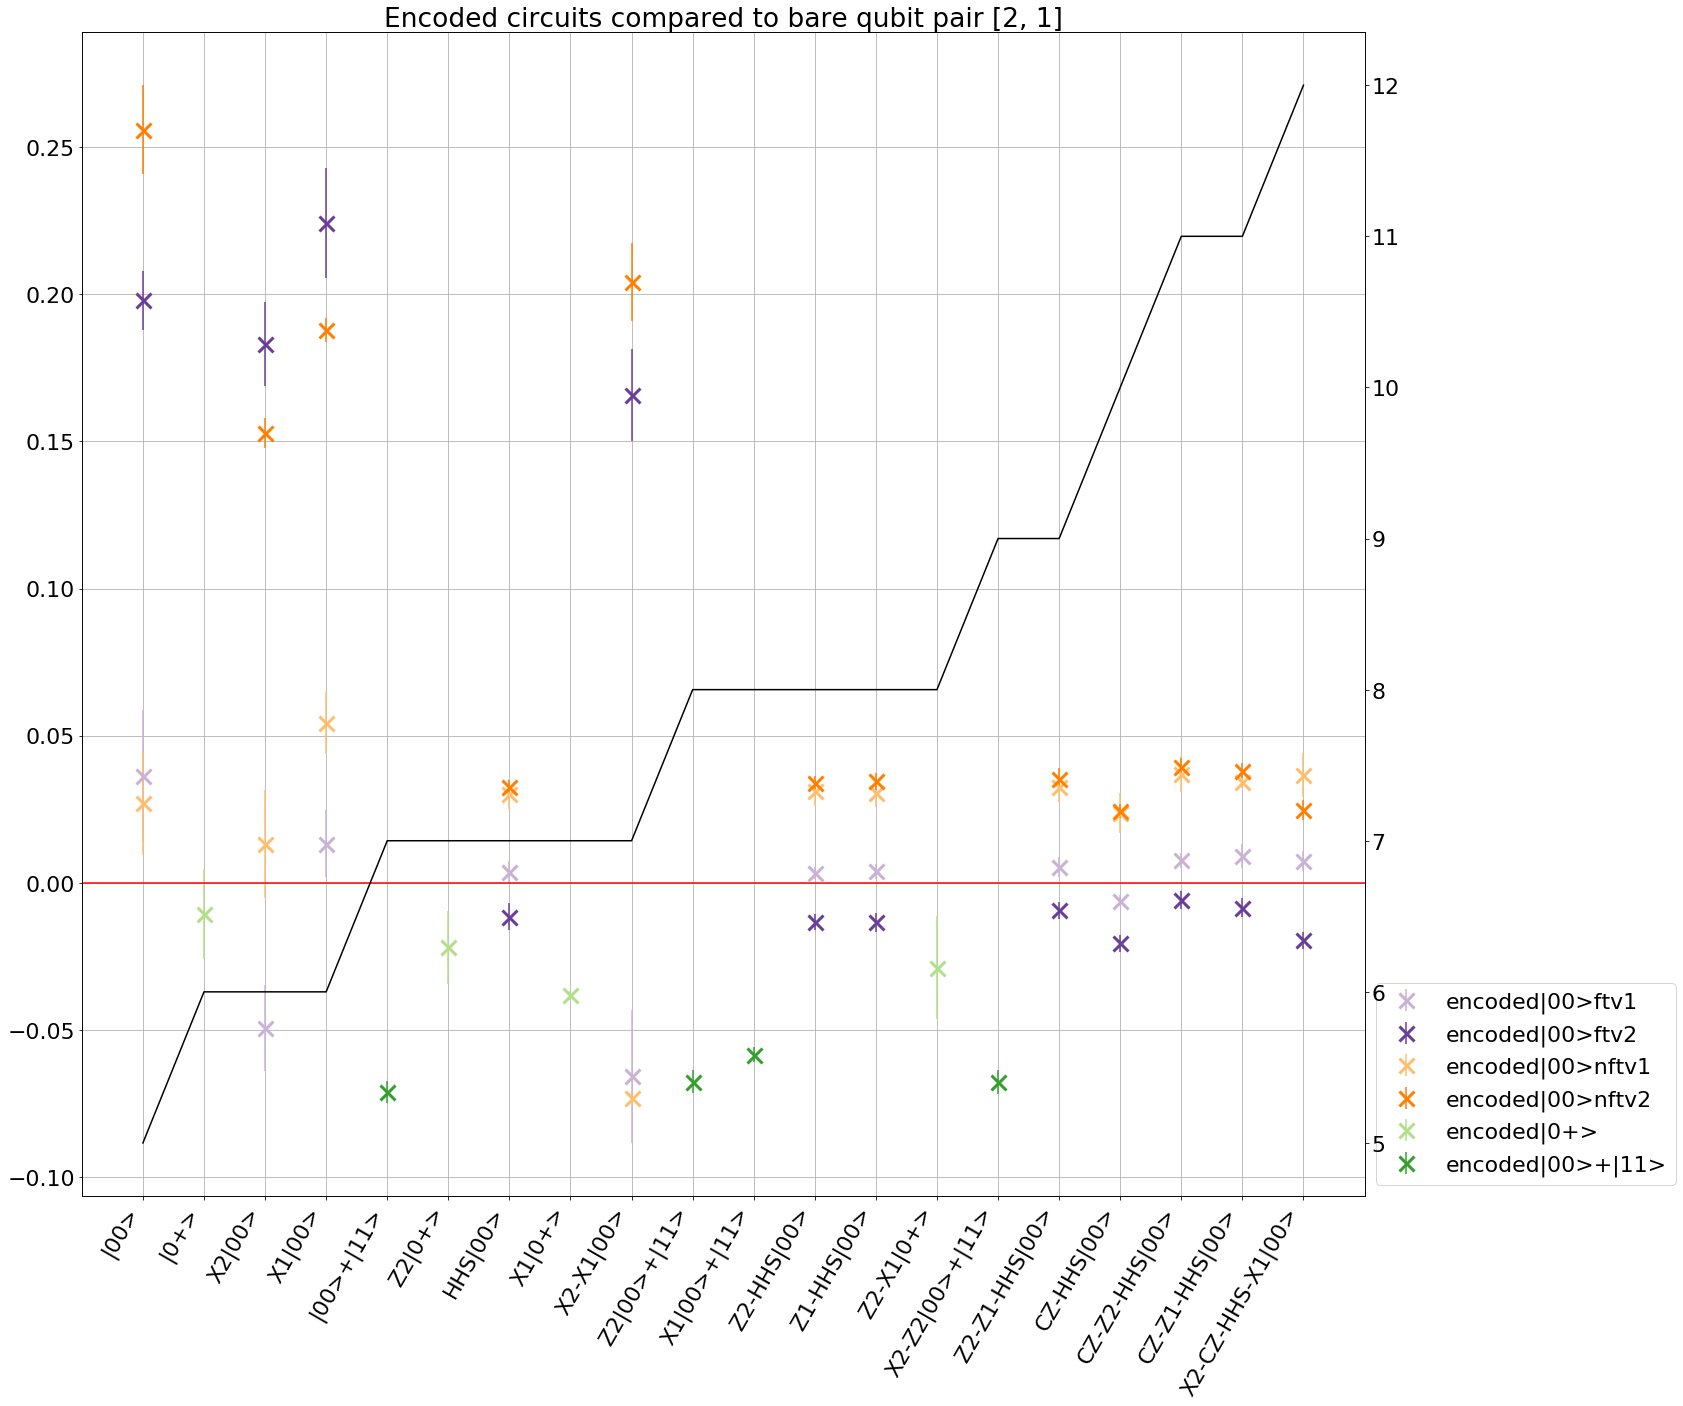

0 27398
bare[1, 0] 0.0672178879495609
bare[2, 0] 0.055036253140751126
bare[2, 1] 0.0648934692934251
bare[2, 4] 0.06984813141108422
bare[3, 2] 0.06273241831836669
bare[3, 4] 0.07725998894284998


In [21]:
plottool.plot_everything_averaged_diff('data/Processed_data/', 
                                 logscaley=False,
                                 bareindex=2,
                                 ci=.99)

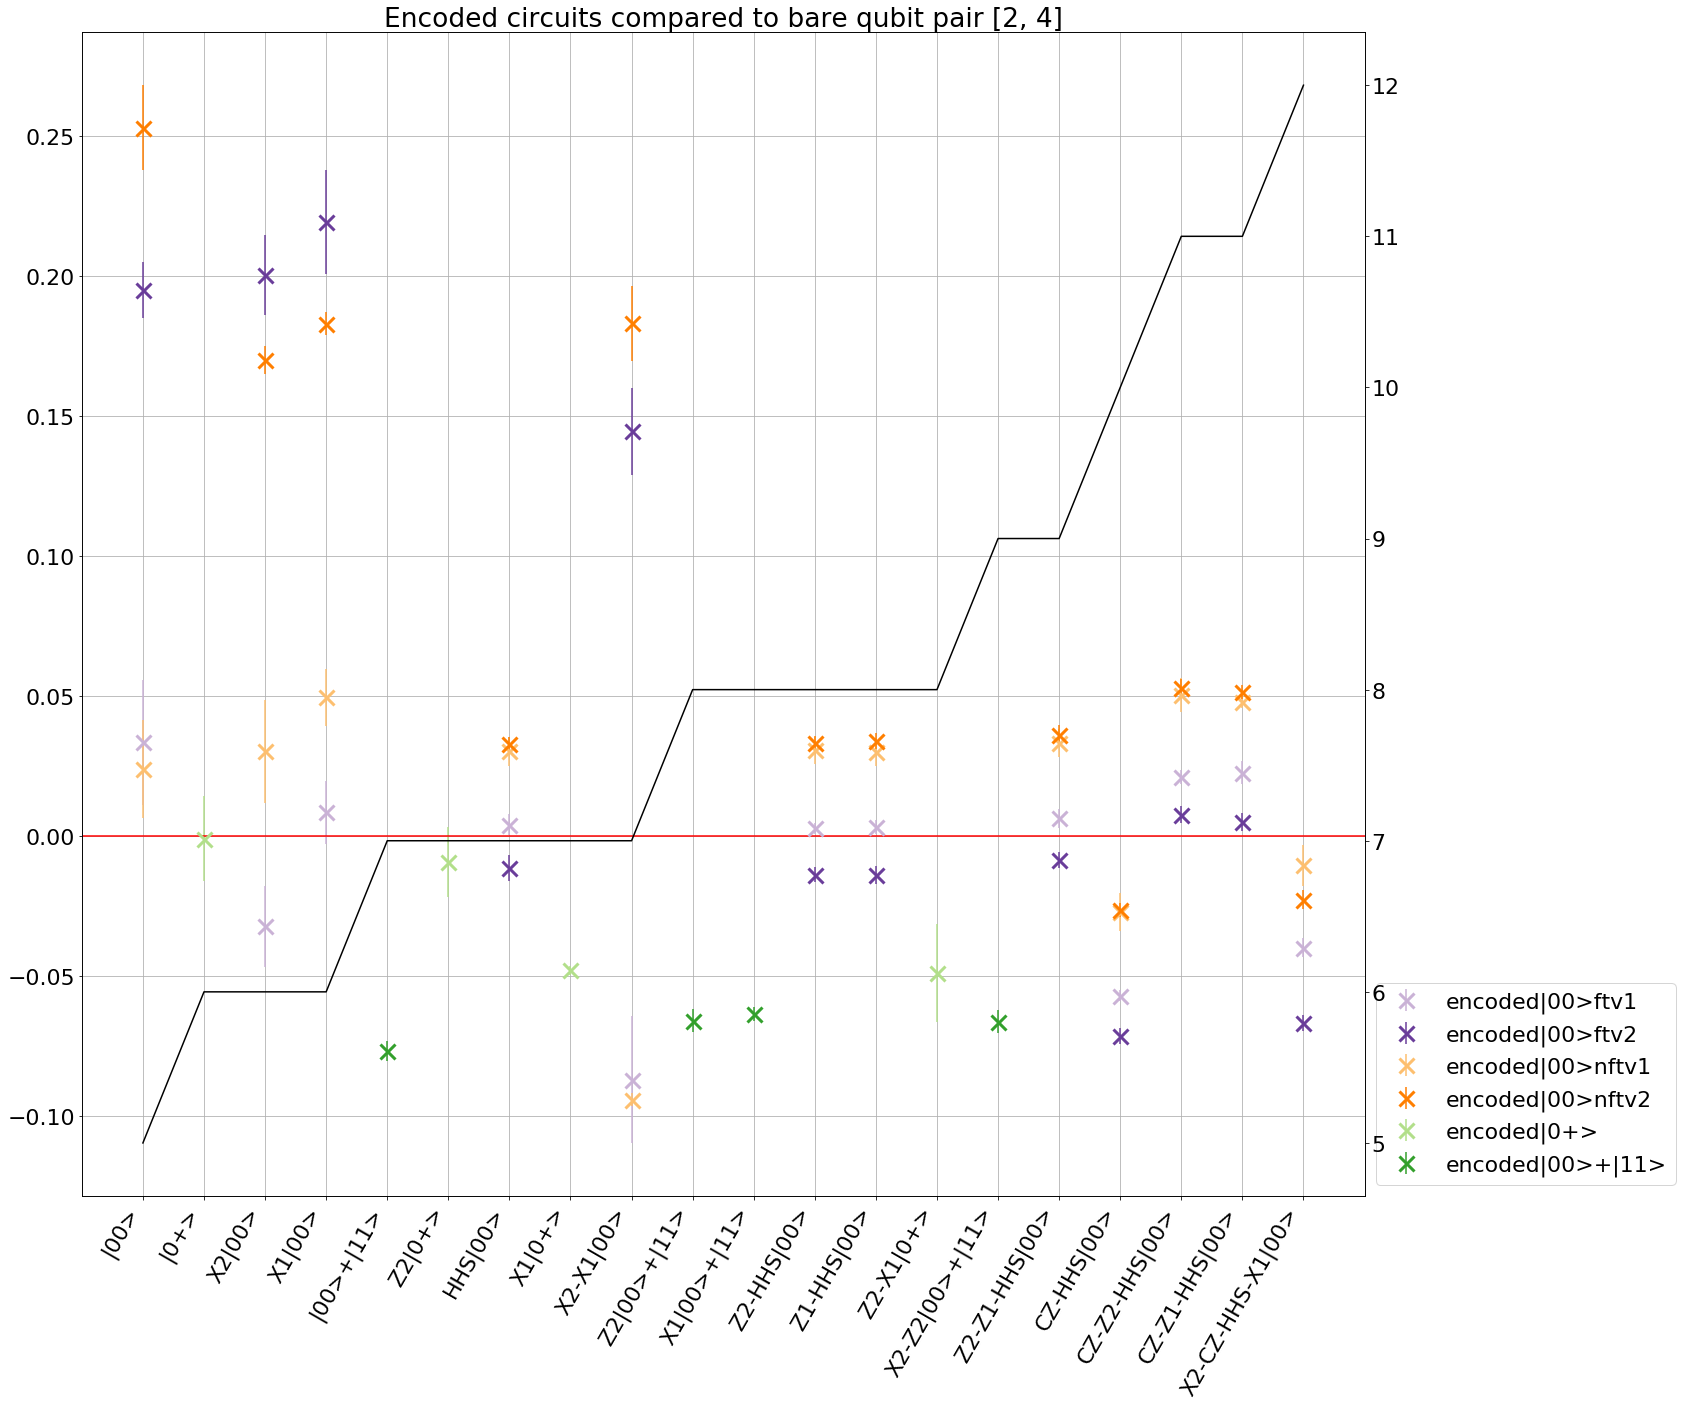

0 27398
bare[1, 0] 0.0672178879495609
bare[2, 0] 0.055036253140751126
bare[2, 1] 0.0648934692934251
bare[2, 4] 0.06984813141108422
bare[3, 2] 0.06273241831836669
bare[3, 4] 0.07725998894284998


In [22]:
plottool.plot_everything_averaged_diff('data/Processed_data/', 
                                 logscaley=False,
                                 bareindex=3,
                                 ci=.99)

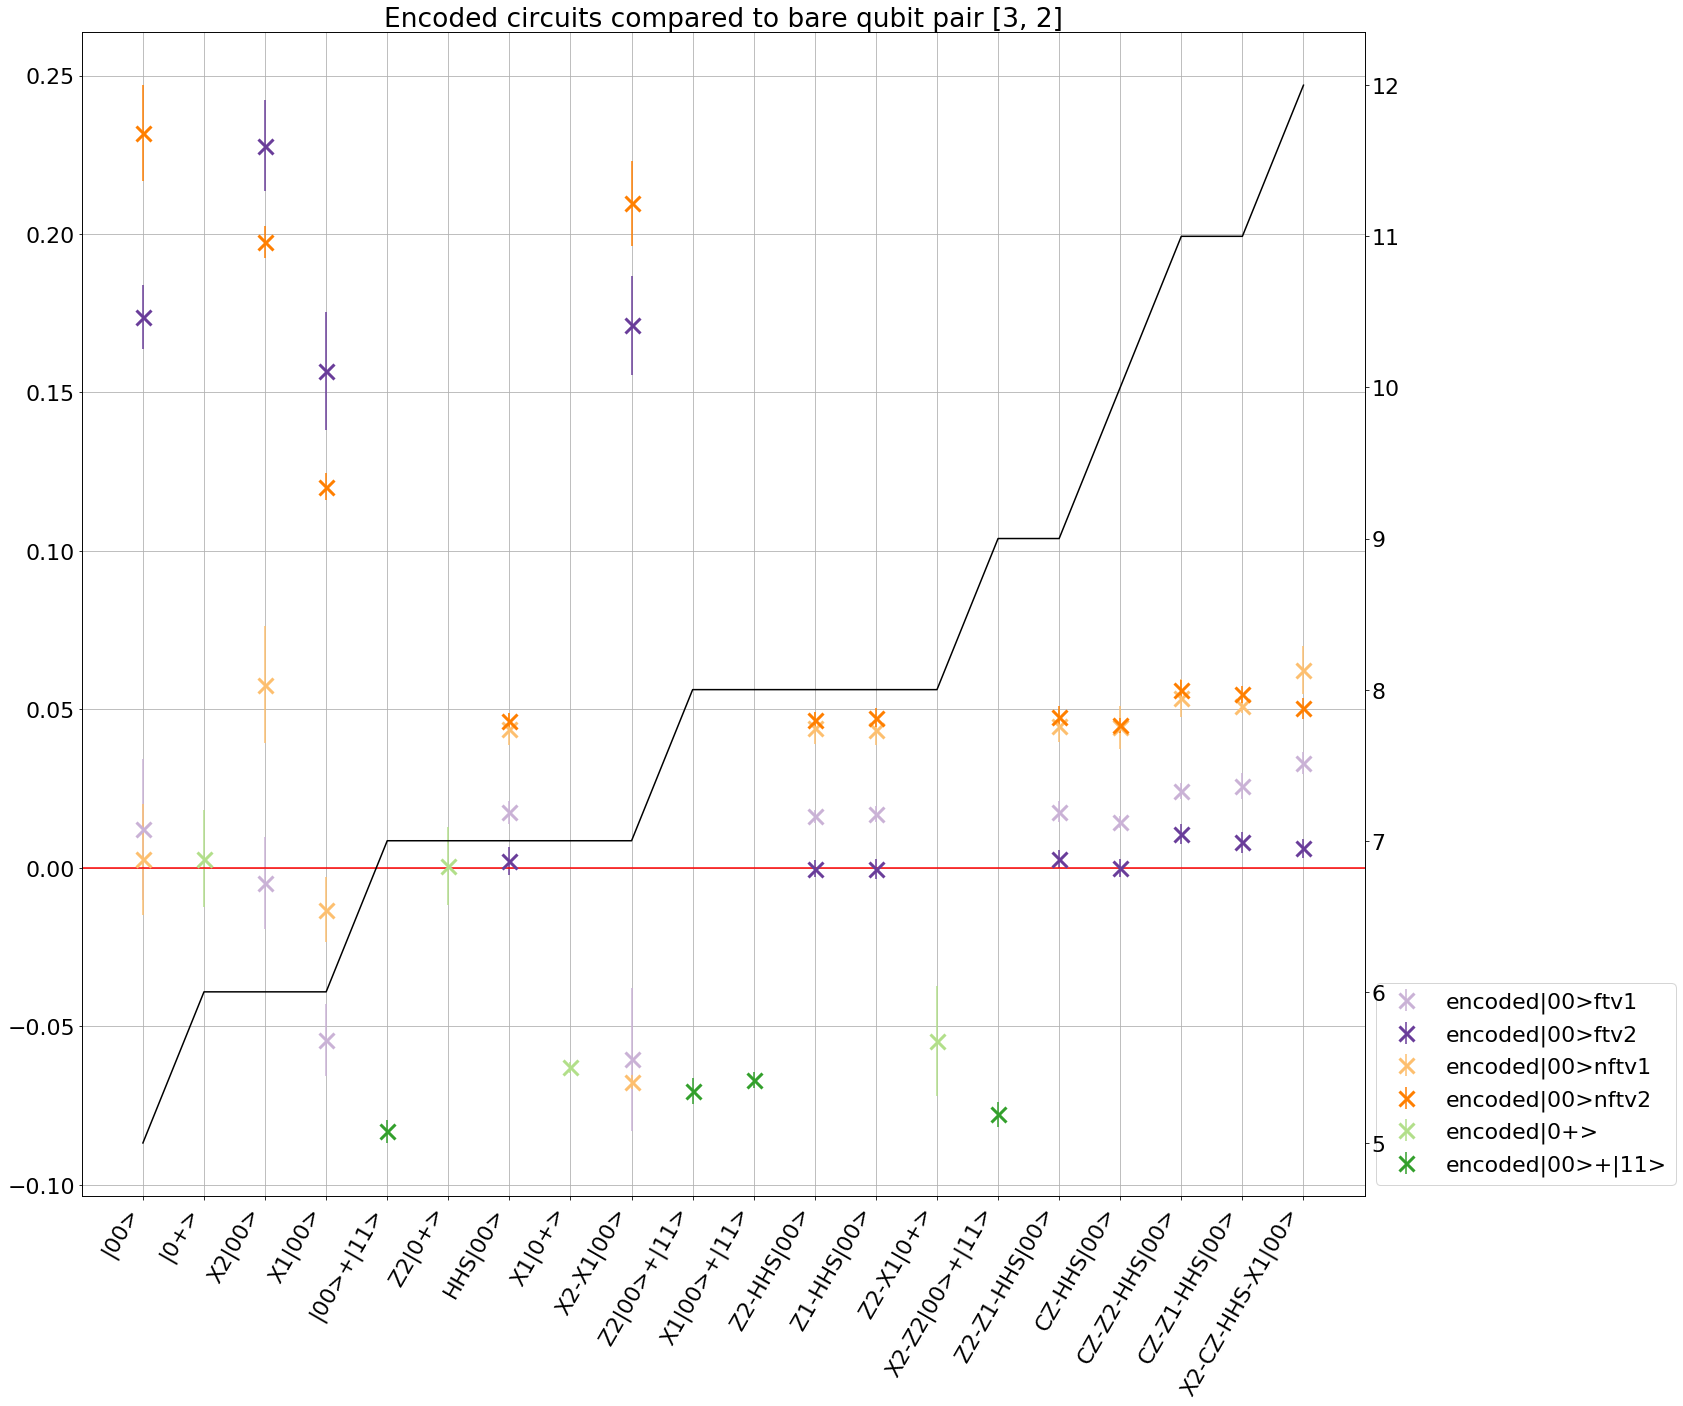

0 27398
bare[1, 0] 0.0672178879495609
bare[2, 0] 0.055036253140751126
bare[2, 1] 0.0648934692934251
bare[2, 4] 0.06984813141108422
bare[3, 2] 0.06273241831836669
bare[3, 4] 0.07725998894284998


In [23]:
plottool.plot_everything_averaged_diff('data/Processed_data/', 
                                 logscaley=False,
                                 bareindex=4,
                                 ci=.99)

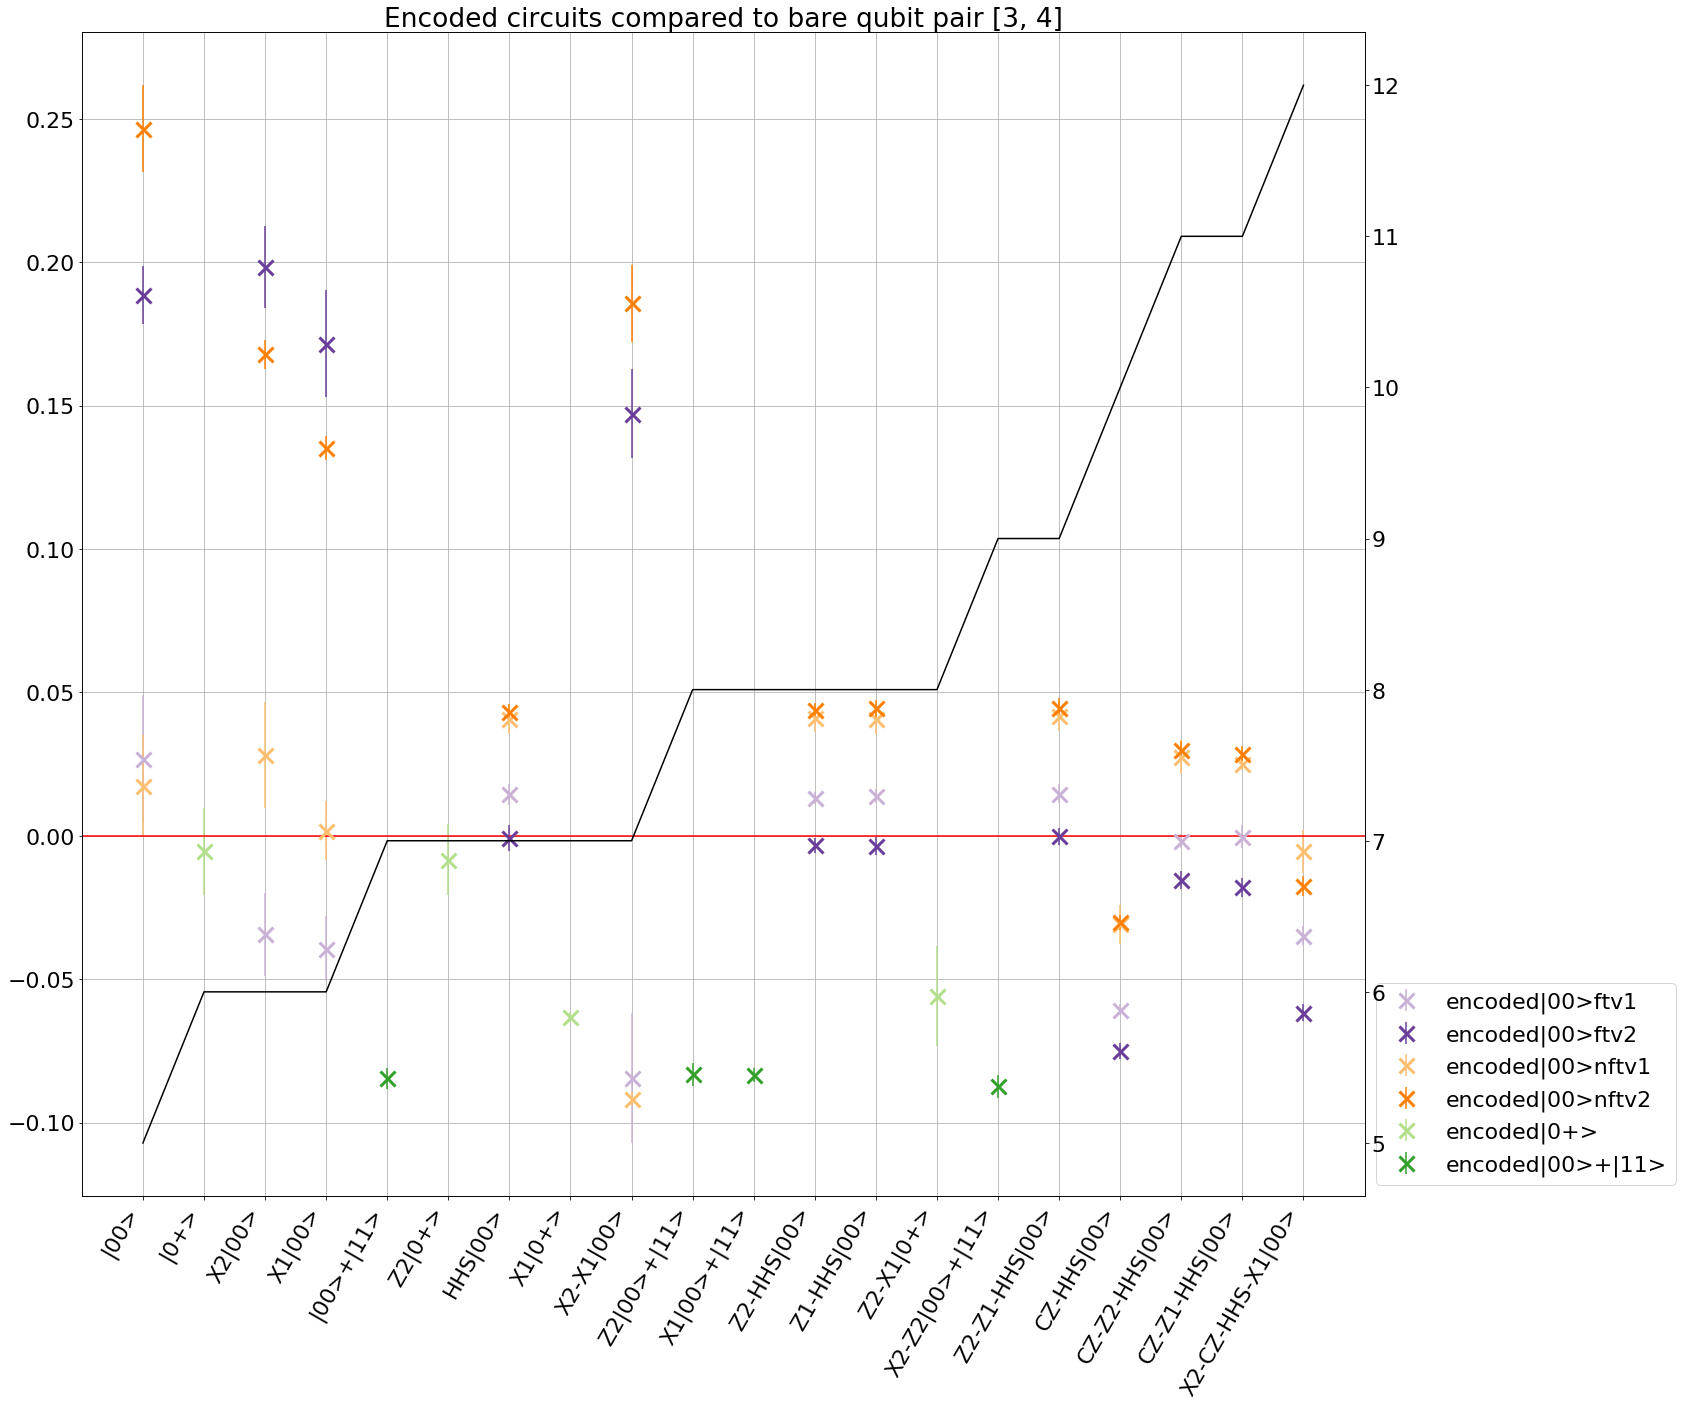

0 27398
bare[1, 0] 0.0672178879495609
bare[2, 0] 0.055036253140751126
bare[2, 1] 0.0648934692934251
bare[2, 4] 0.06984813141108422
bare[3, 2] 0.06273241831836669
bare[3, 4] 0.07725998894284998


In [24]:
plottool.plot_everything_averaged_diff('data/Processed_data/', 
                                 logscaley=False,
                                 bareindex=5,
                                 ci=.99)

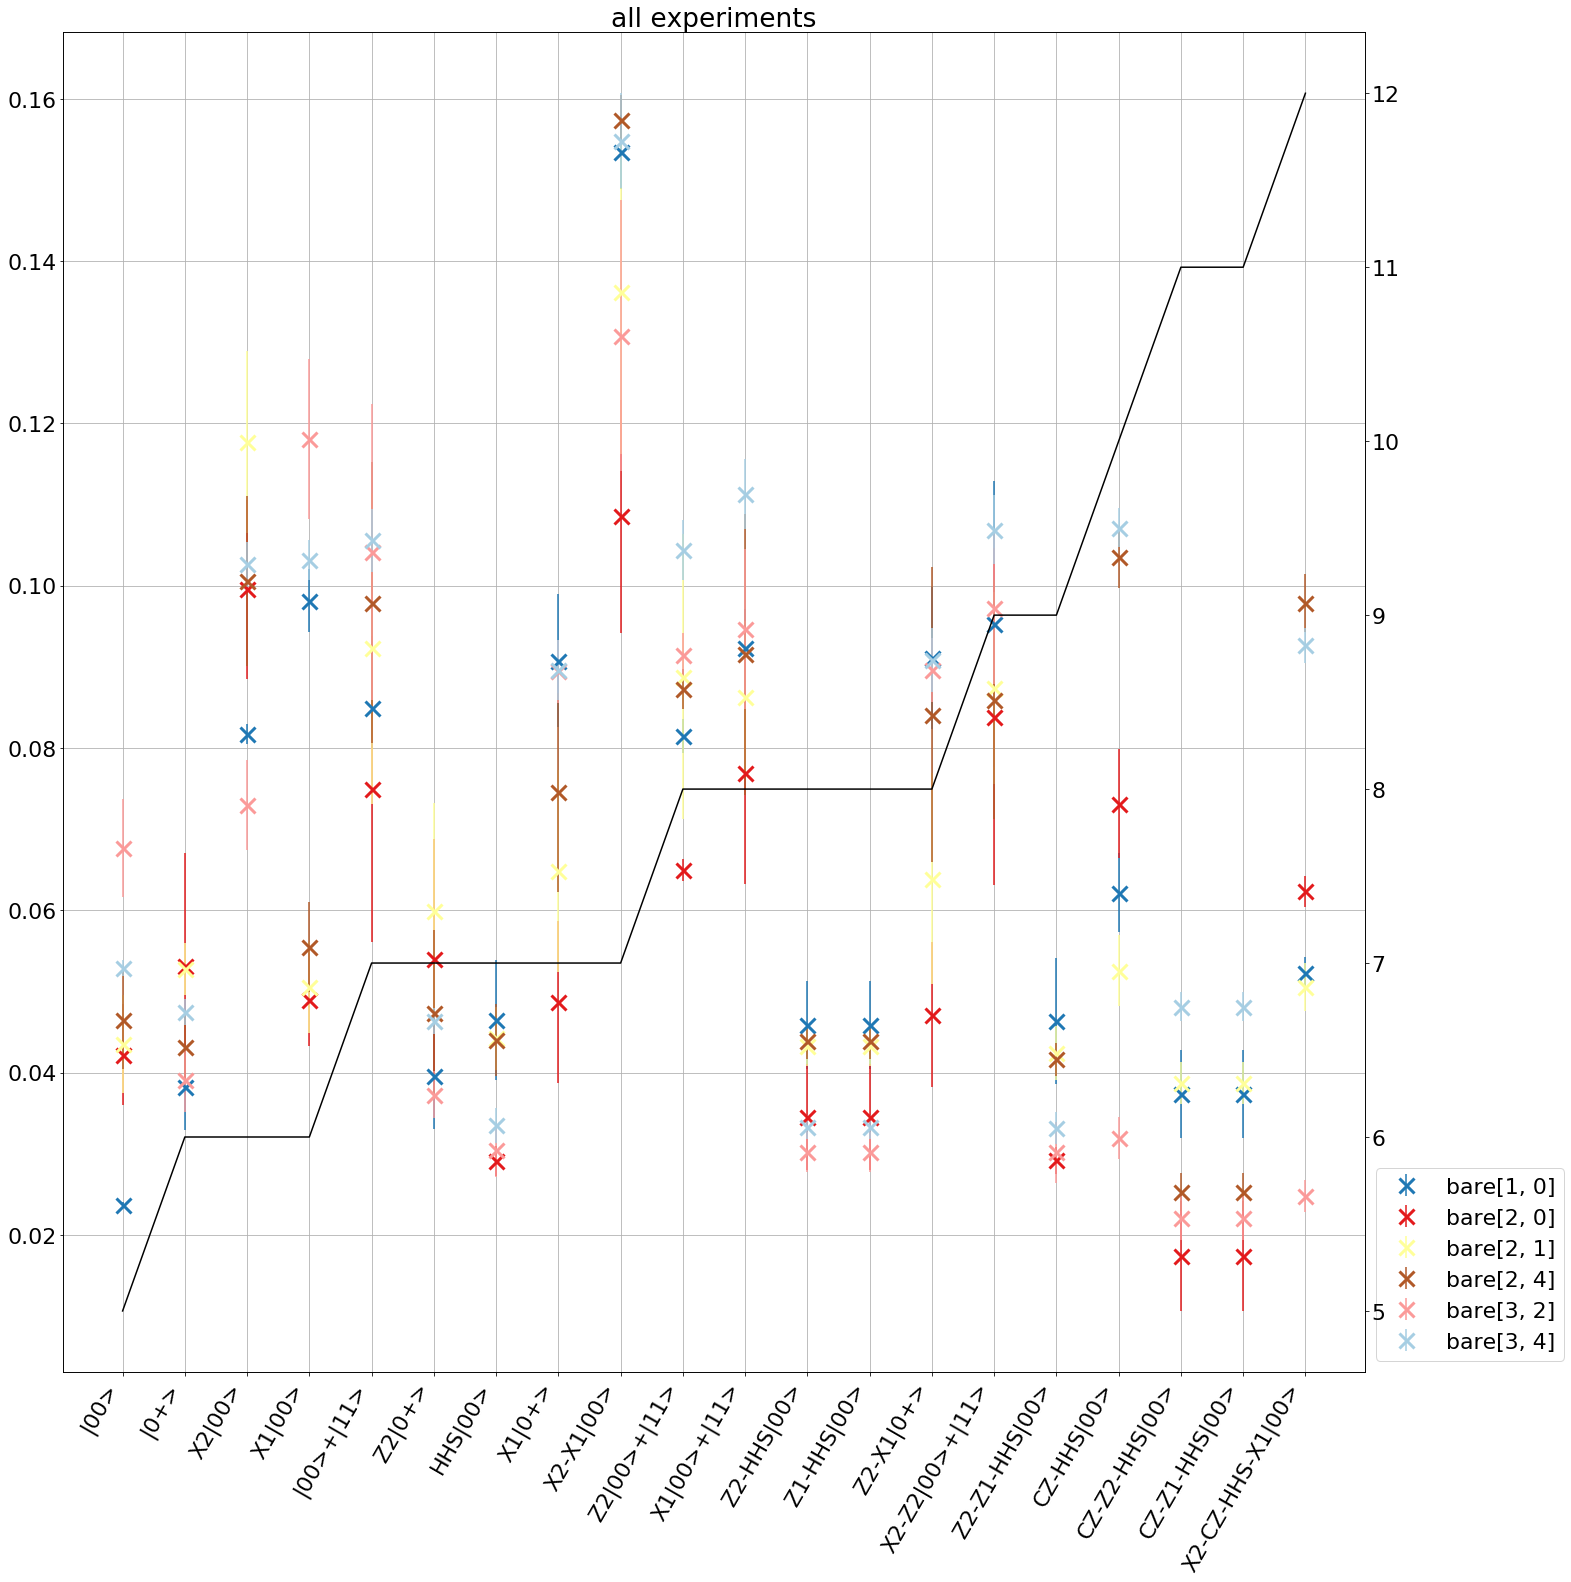

0 27398
bare[1, 0] 0.0672178879495609
bare[2, 0] 0.055036253140751126
bare[2, 1] 0.0648934692934251
bare[2, 4] 0.06984813141108422
bare[3, 2] 0.06273241831836669
bare[3, 4] 0.07725998894284998


In [25]:
plottool.plot_everything_averaged('data/Processed_data/', 
                                 logscaley=False,
                                 sublabels=plottool.PLOT_LABELS[:6],
                                 ci=.99)

In [150]:
import os

In [106]:
importlib.reload(exptool)
importlib.reload(plottool)

<module 'tools.Ploting_tools' from '/Users/cvuillot/Work/Programming/IBMQE/qiskit-sdk-py/examples/experimenting_with_fault_tolerance/tools/Ploting_tools.py'>

In [152]:
file_list = os.listdir('data/Processed_data/')
n=0
for filename in file_list:
    n += exptool.repair_processed_data('data/Processed_data/'+filename, new_ext='')
print(n)

0


In [116]:
importlib.reload(exptool)
importlib.reload(plottool)

<module 'tools.Ploting_tools' from '/Users/cvuillot/Work/Programming/IBMQE/qiskit-sdk-py/examples/experimenting_with_fault_tolerance/tools/Ploting_tools.py'>

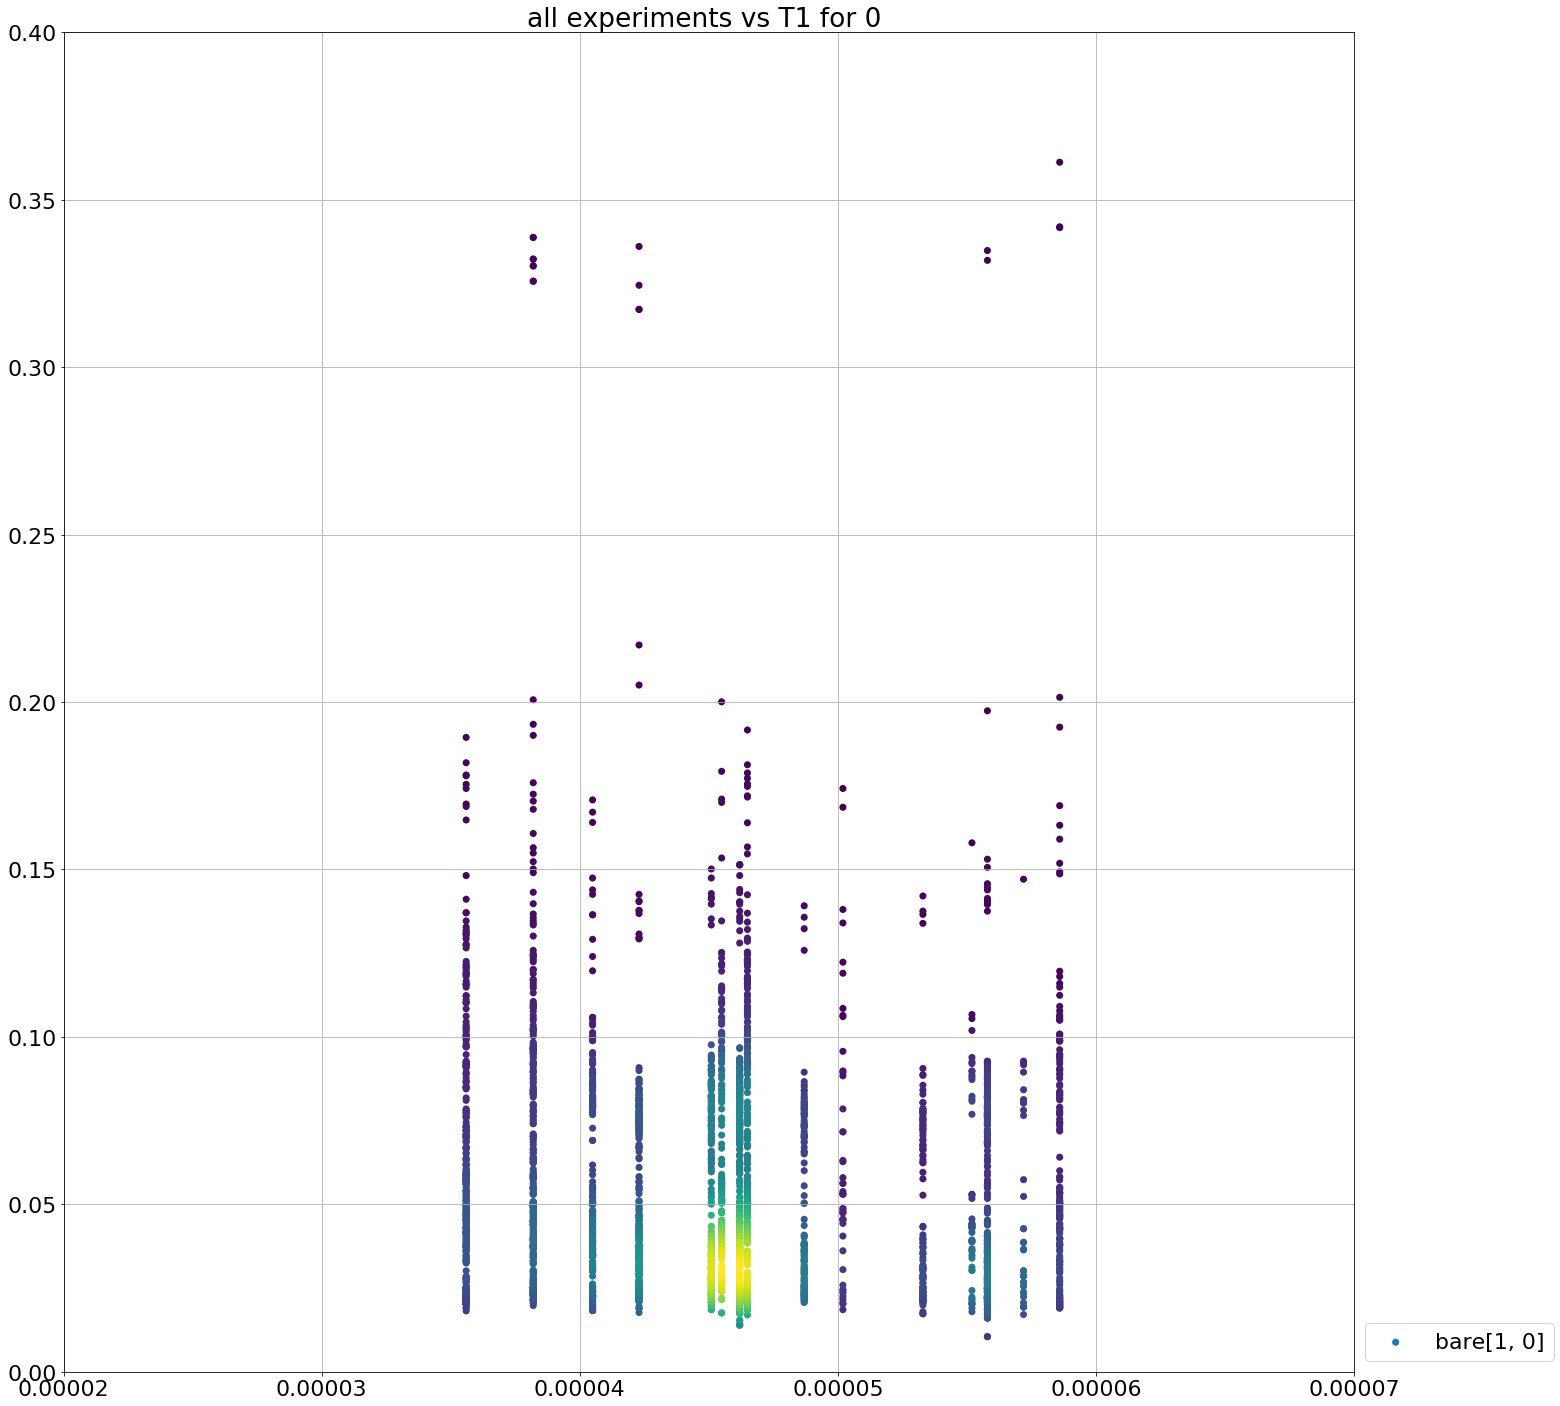

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [117]:
plottool.plot_everything_calib_data('data/Processed_data/', 0, 'T1',  
                                    logscalex=False, 
                                    logscaley=False, 
                                    y_range=[0,0.4], 
                                    x_range=[0.00002,0.00007], 
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [0]])

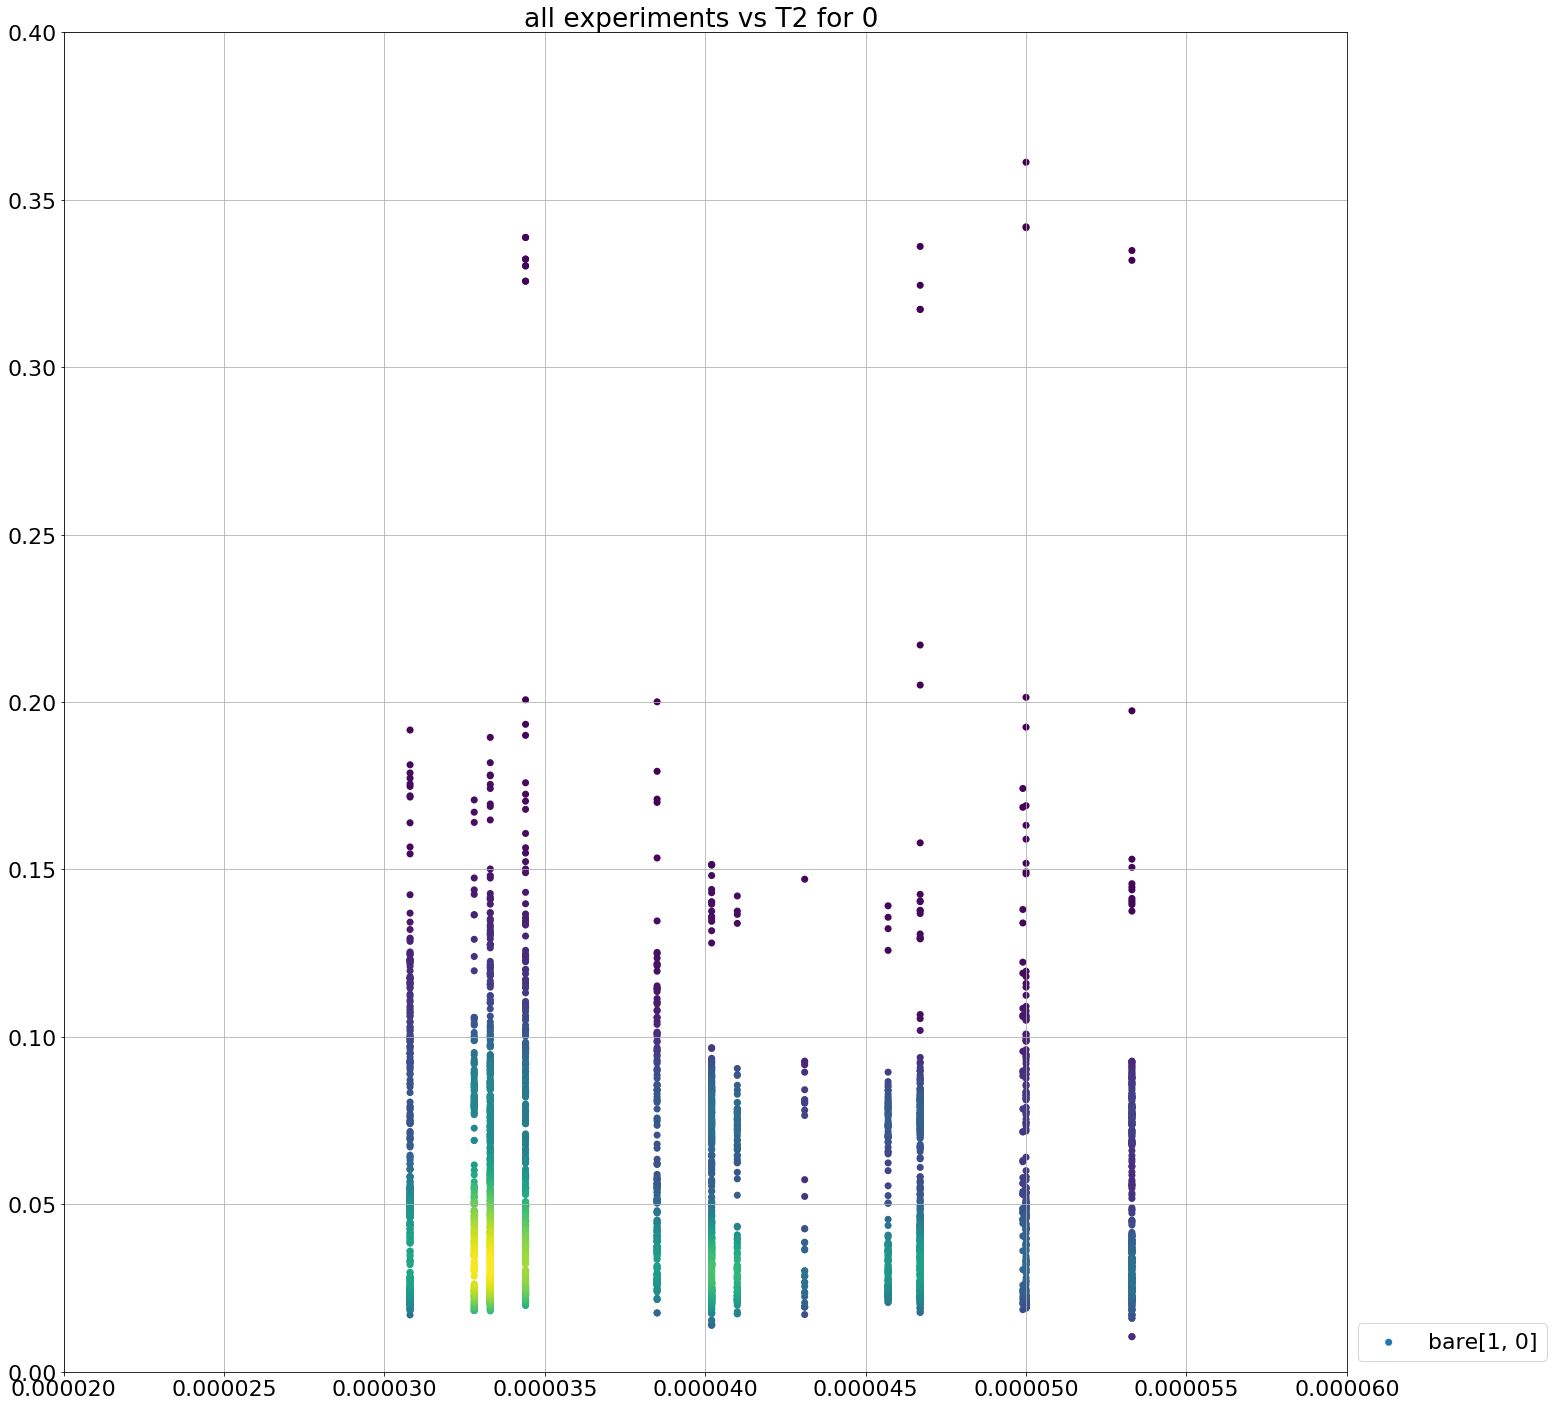

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [91]:
plottool.plot_everything_calib_data('data/Processed_data/', 0, 'T2', 
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.00002,0.00006],
                                    y_range=[0,0.4],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [0]])

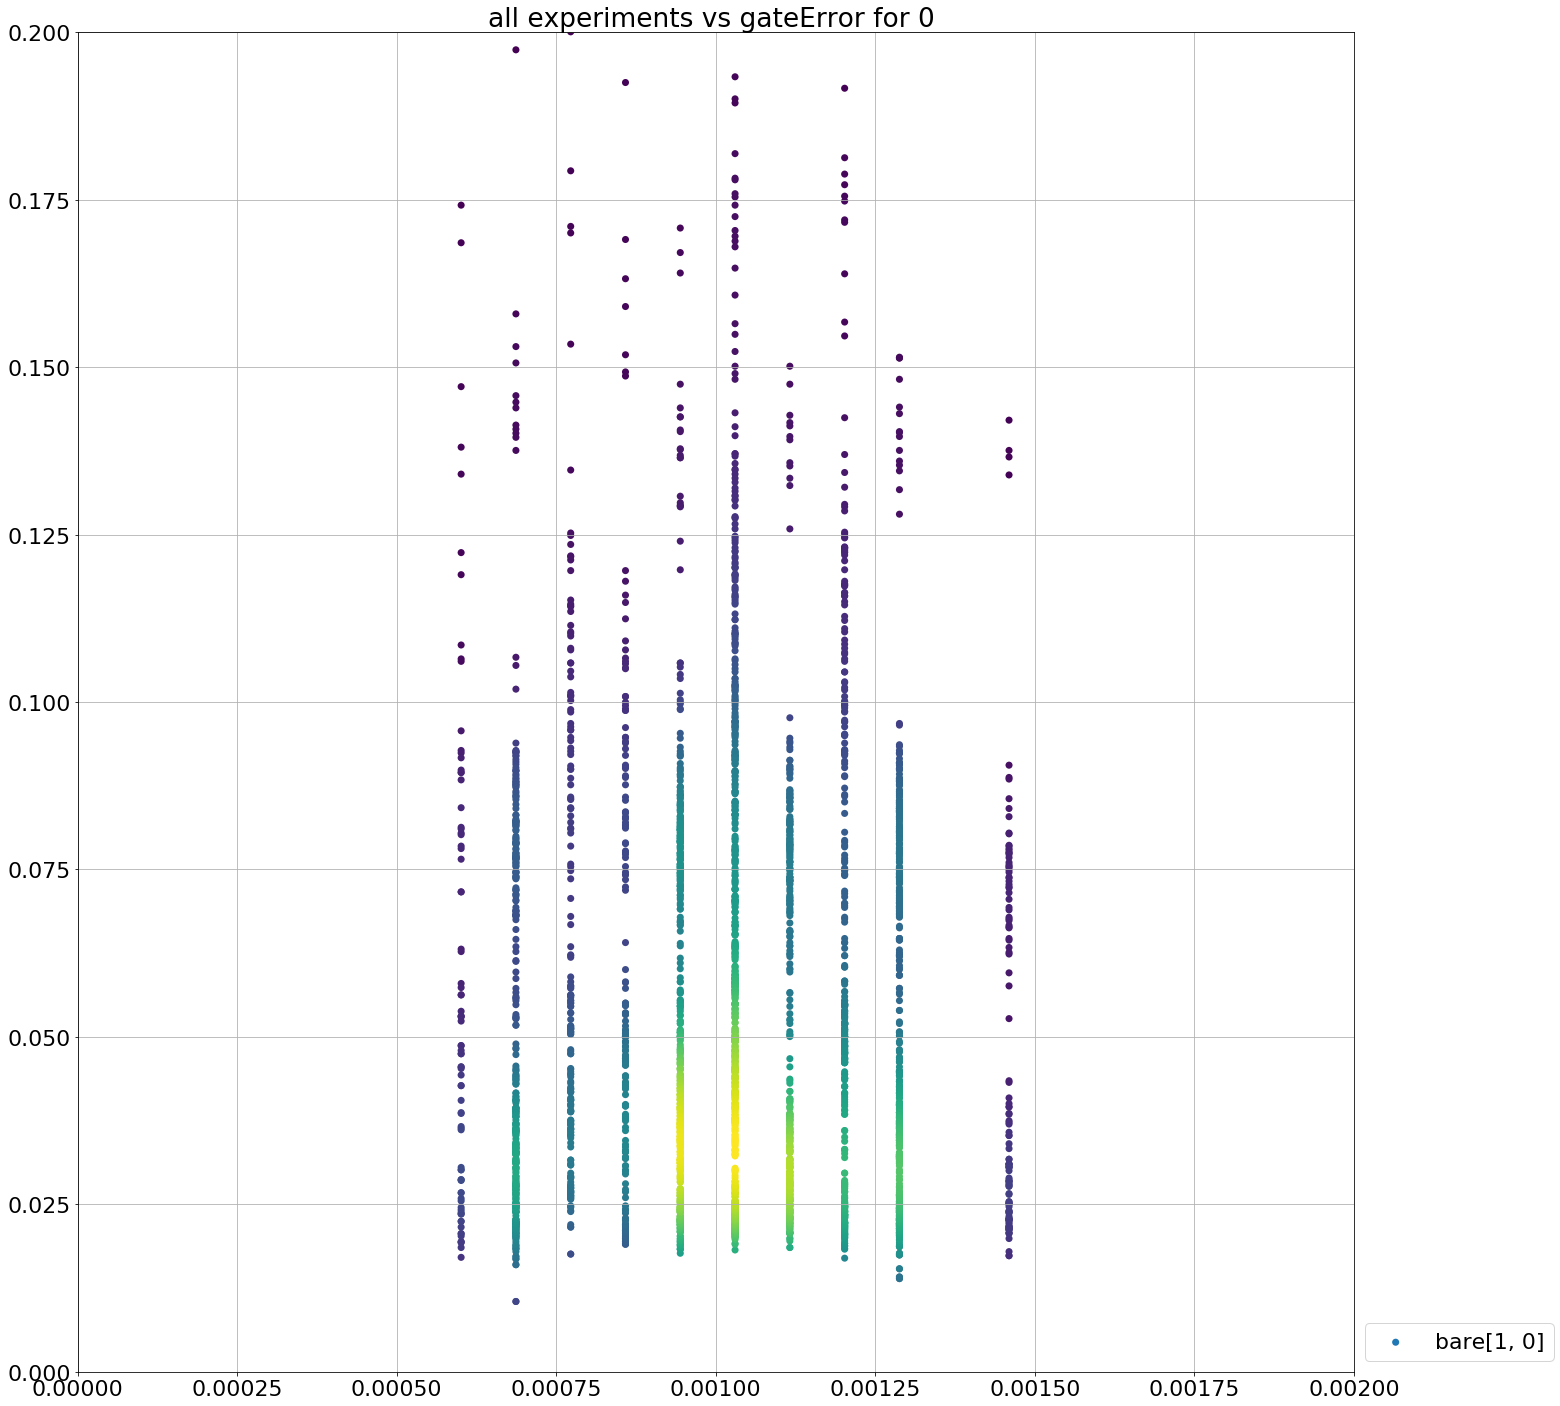

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [98]:
plottool.plot_everything_calib_data('data/Processed_data/', 0, 'gateError', 
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0,0.002],
                                    y_range=[0,0.2],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [0]])

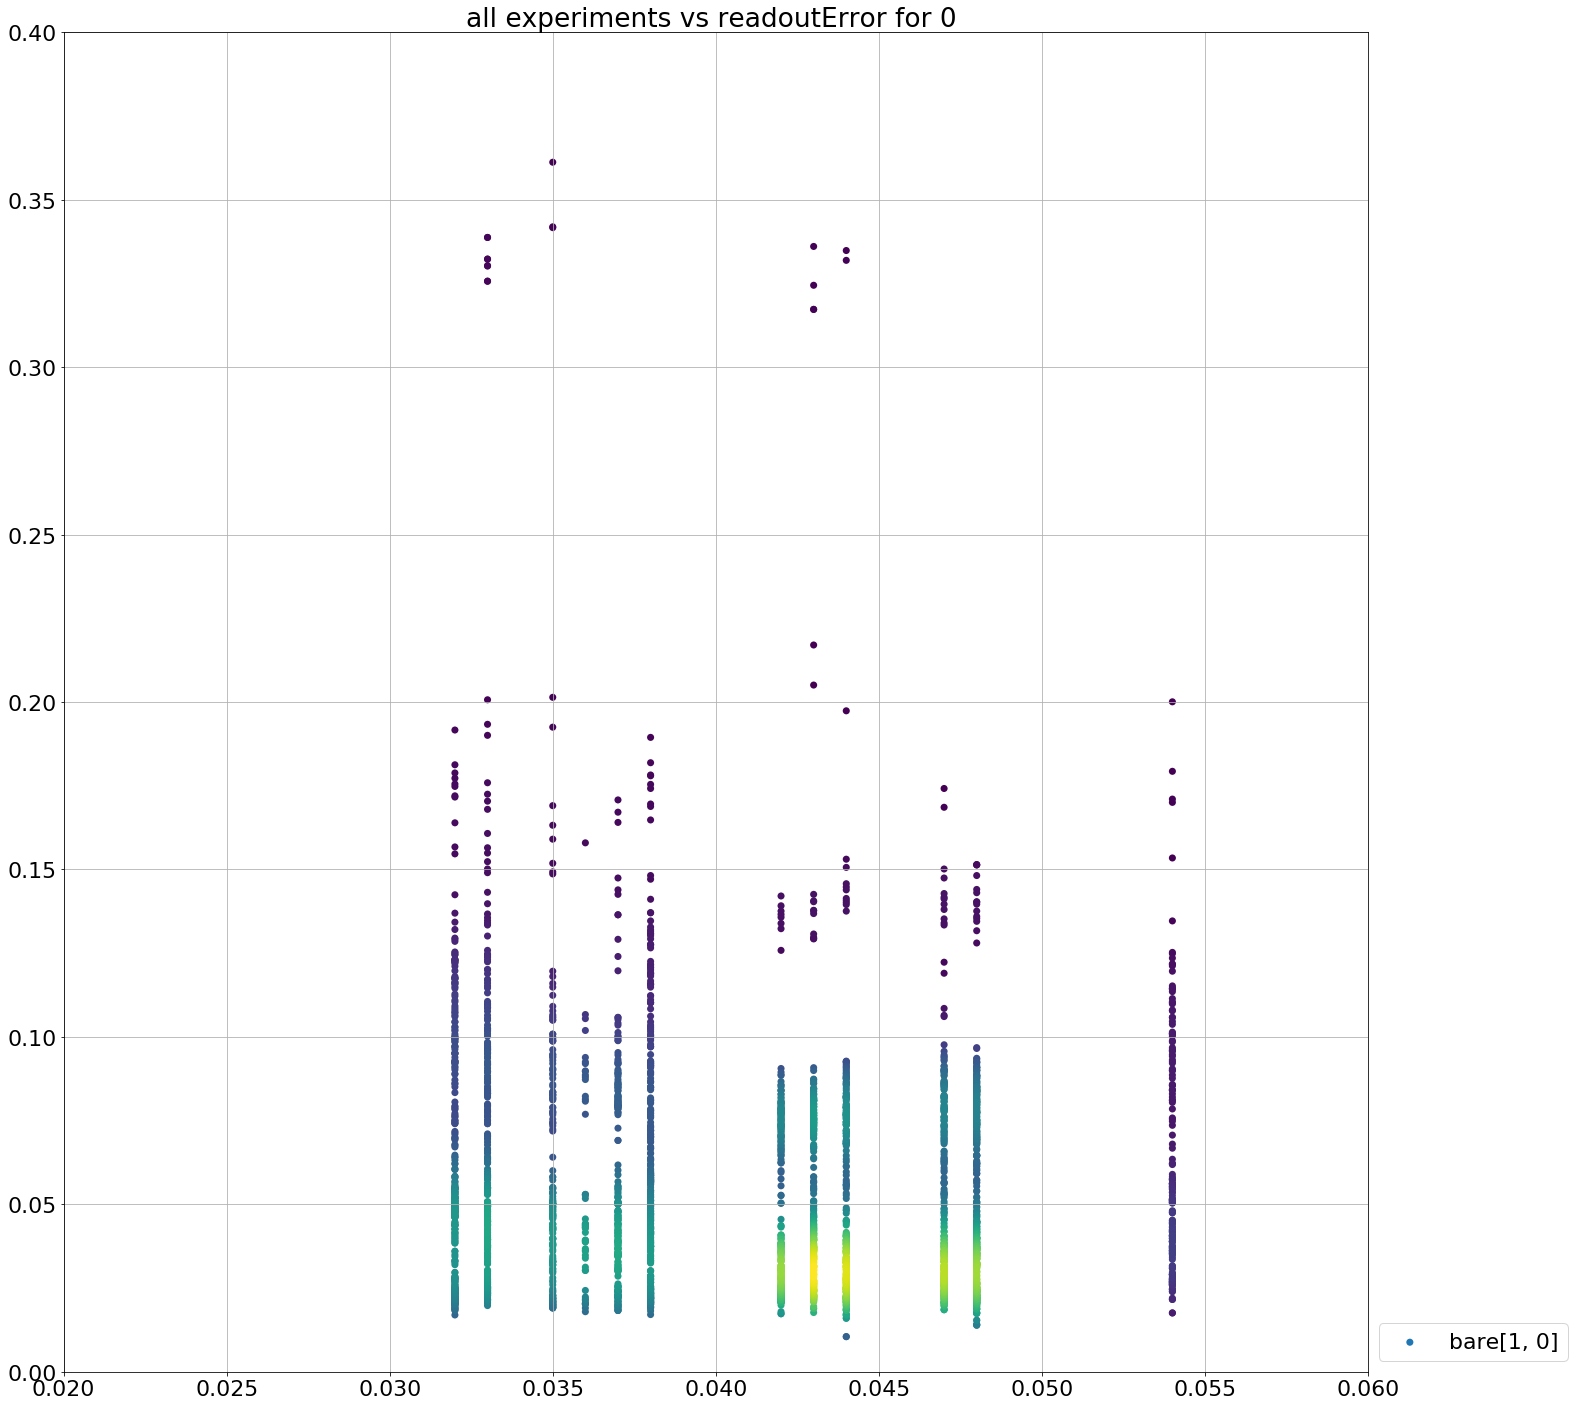

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [94]:
plottool.plot_everything_calib_data('data/Processed_data/', 0, 'readoutError',  
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.02,0.06], 
                                    y_range=[0,0.4],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [0]])

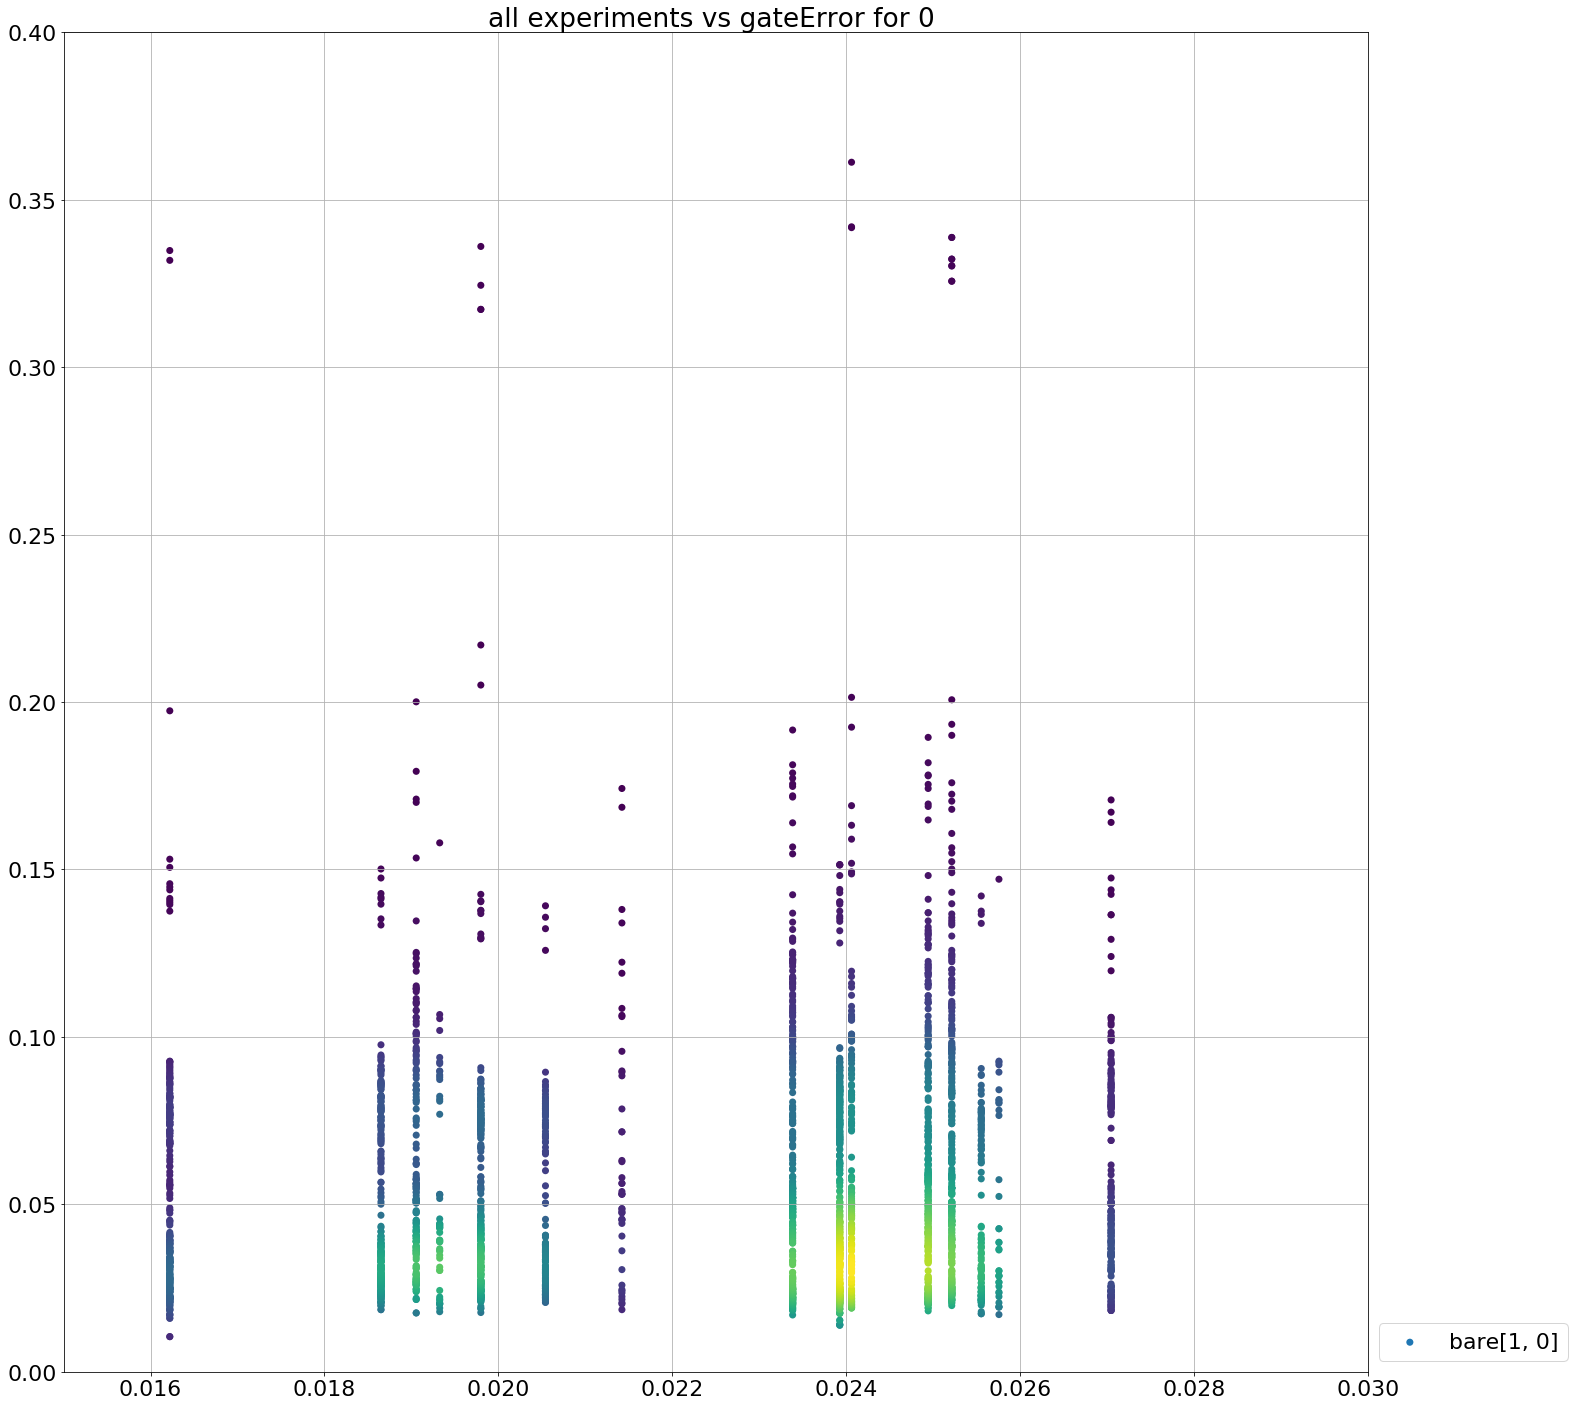

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [96]:
plottool.plot_everything_calib_data('data/Processed_data/', 0, 'gateError', 
                                    multi_qubit_param=True,
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.015,0.03], 
                                    y_range=[0,0.4],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [0]])

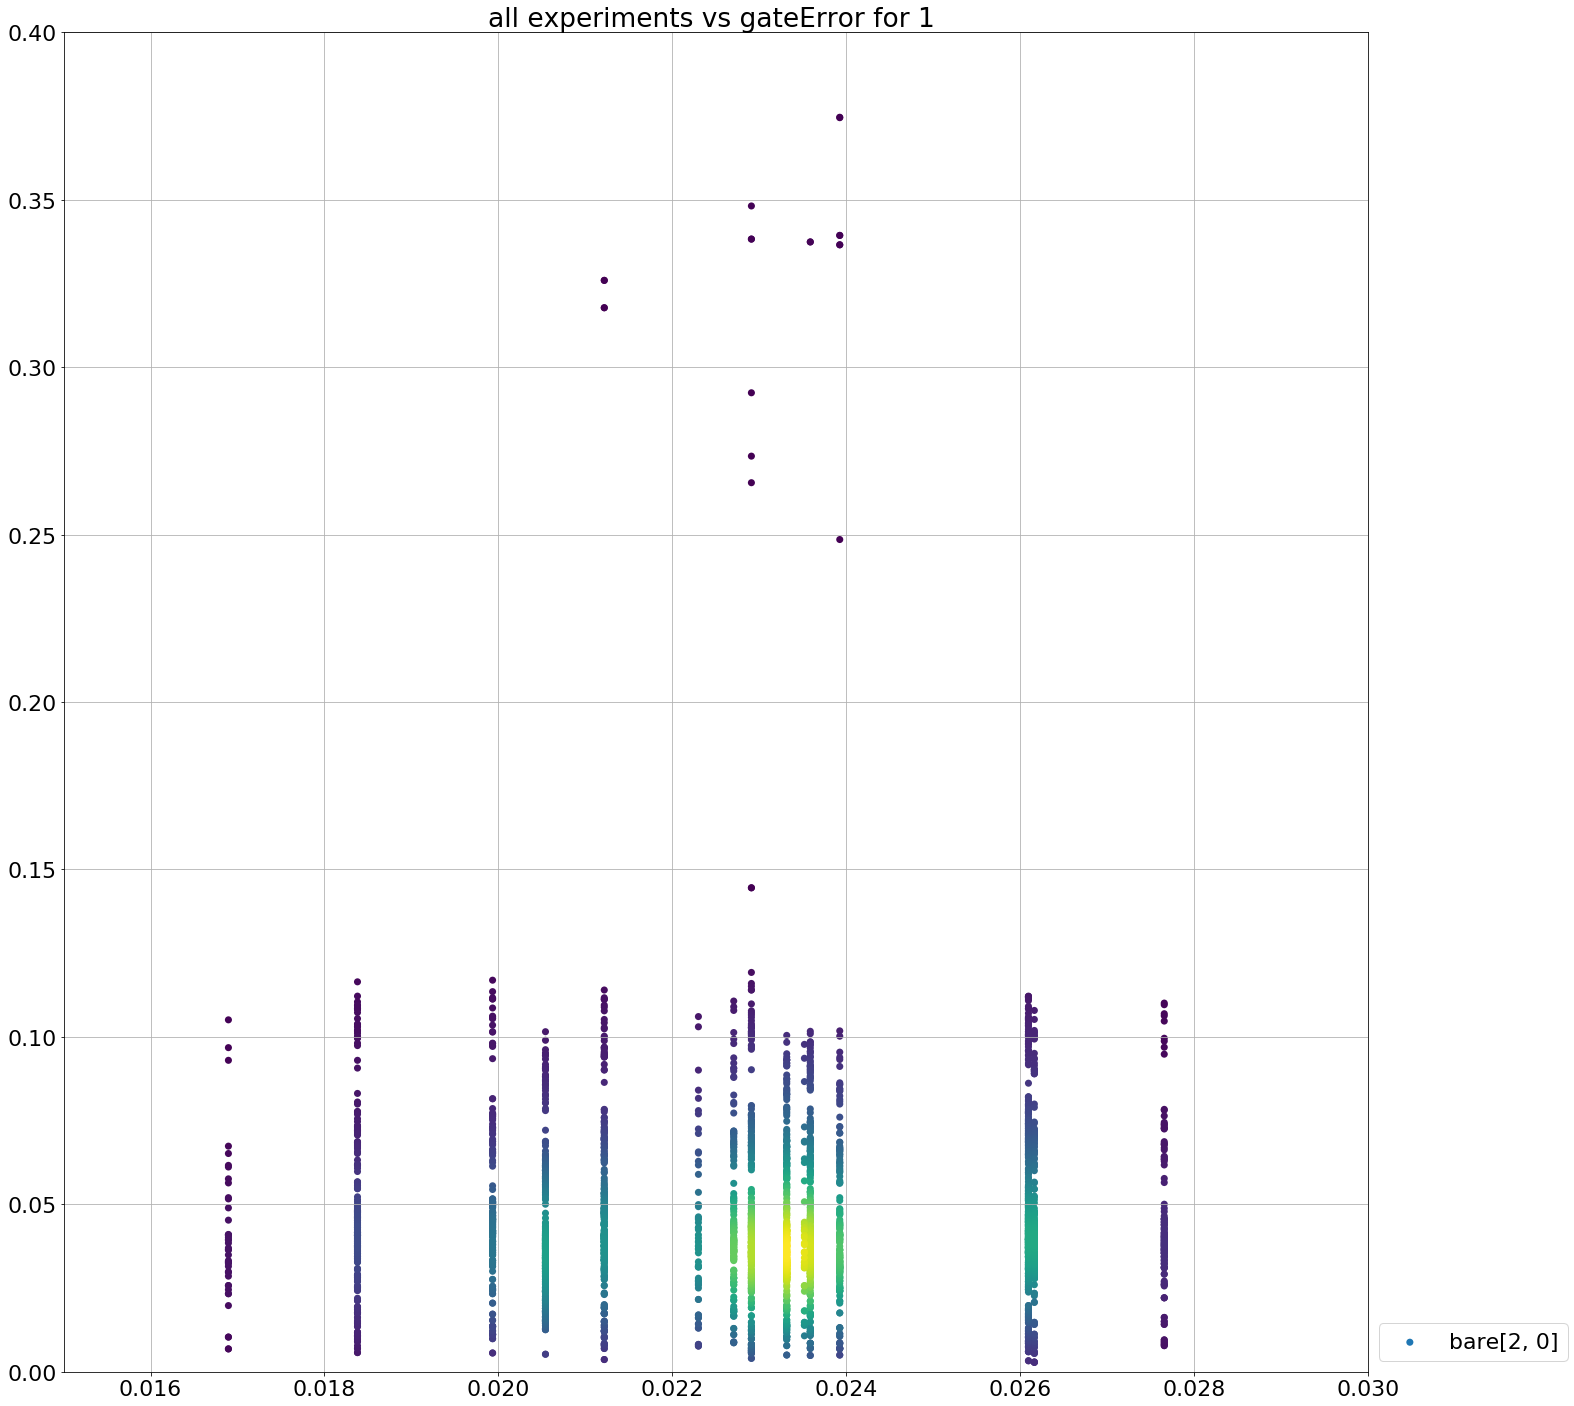

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [97]:
plottool.plot_everything_calib_data('data/Processed_data/', 1, 'gateError', 
                                    multi_qubit_param=True,
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.015,0.03], 
                                    y_range=[0,0.4],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [1]])

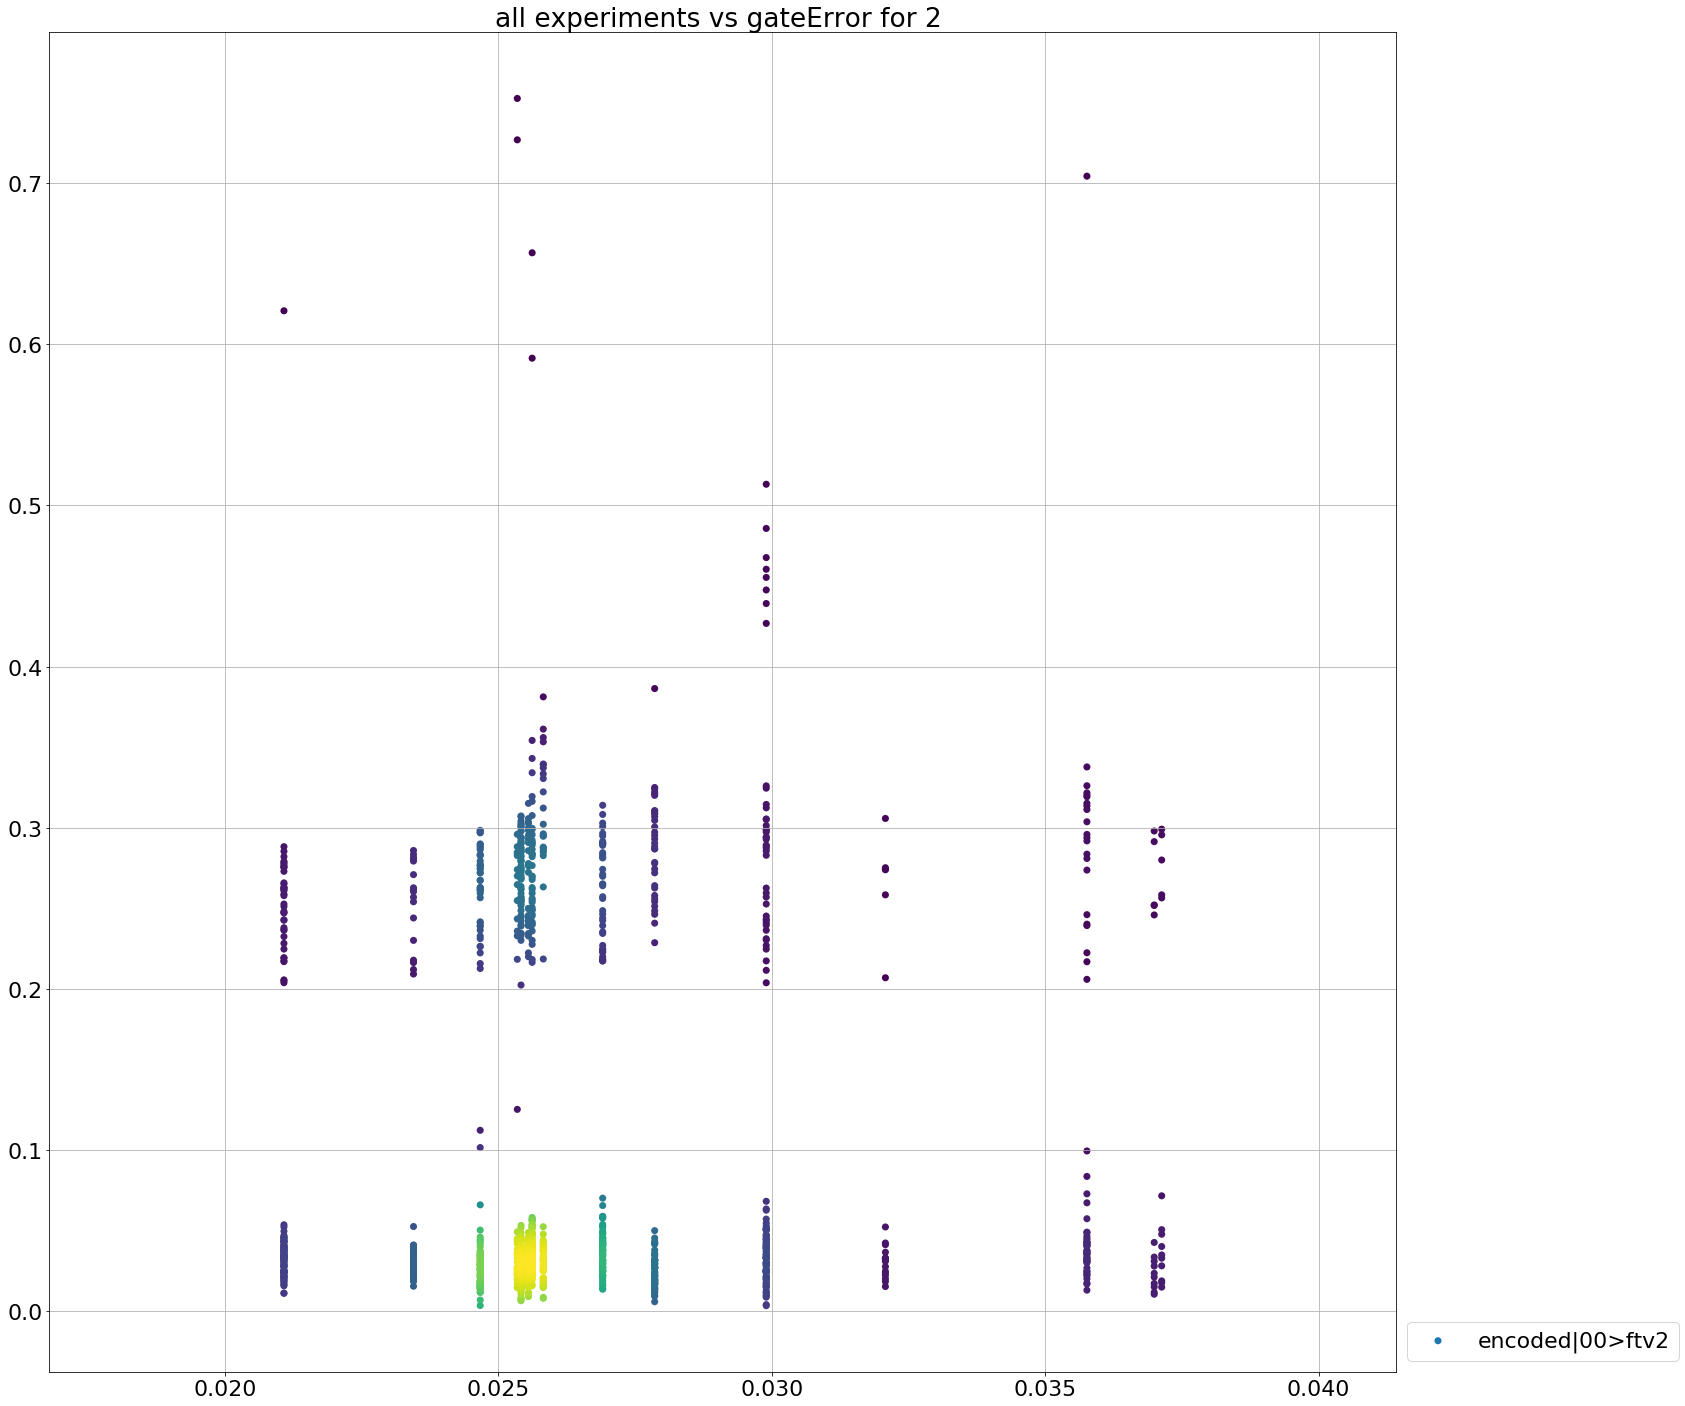

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [109]:
plottool.plot_everything_calib_data('data/Processed_data/', 2, 'gateError', 
                                    multi_qubit_param=True,
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.01,0.035], 
                                    y_range=[0,0.15],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [7]])

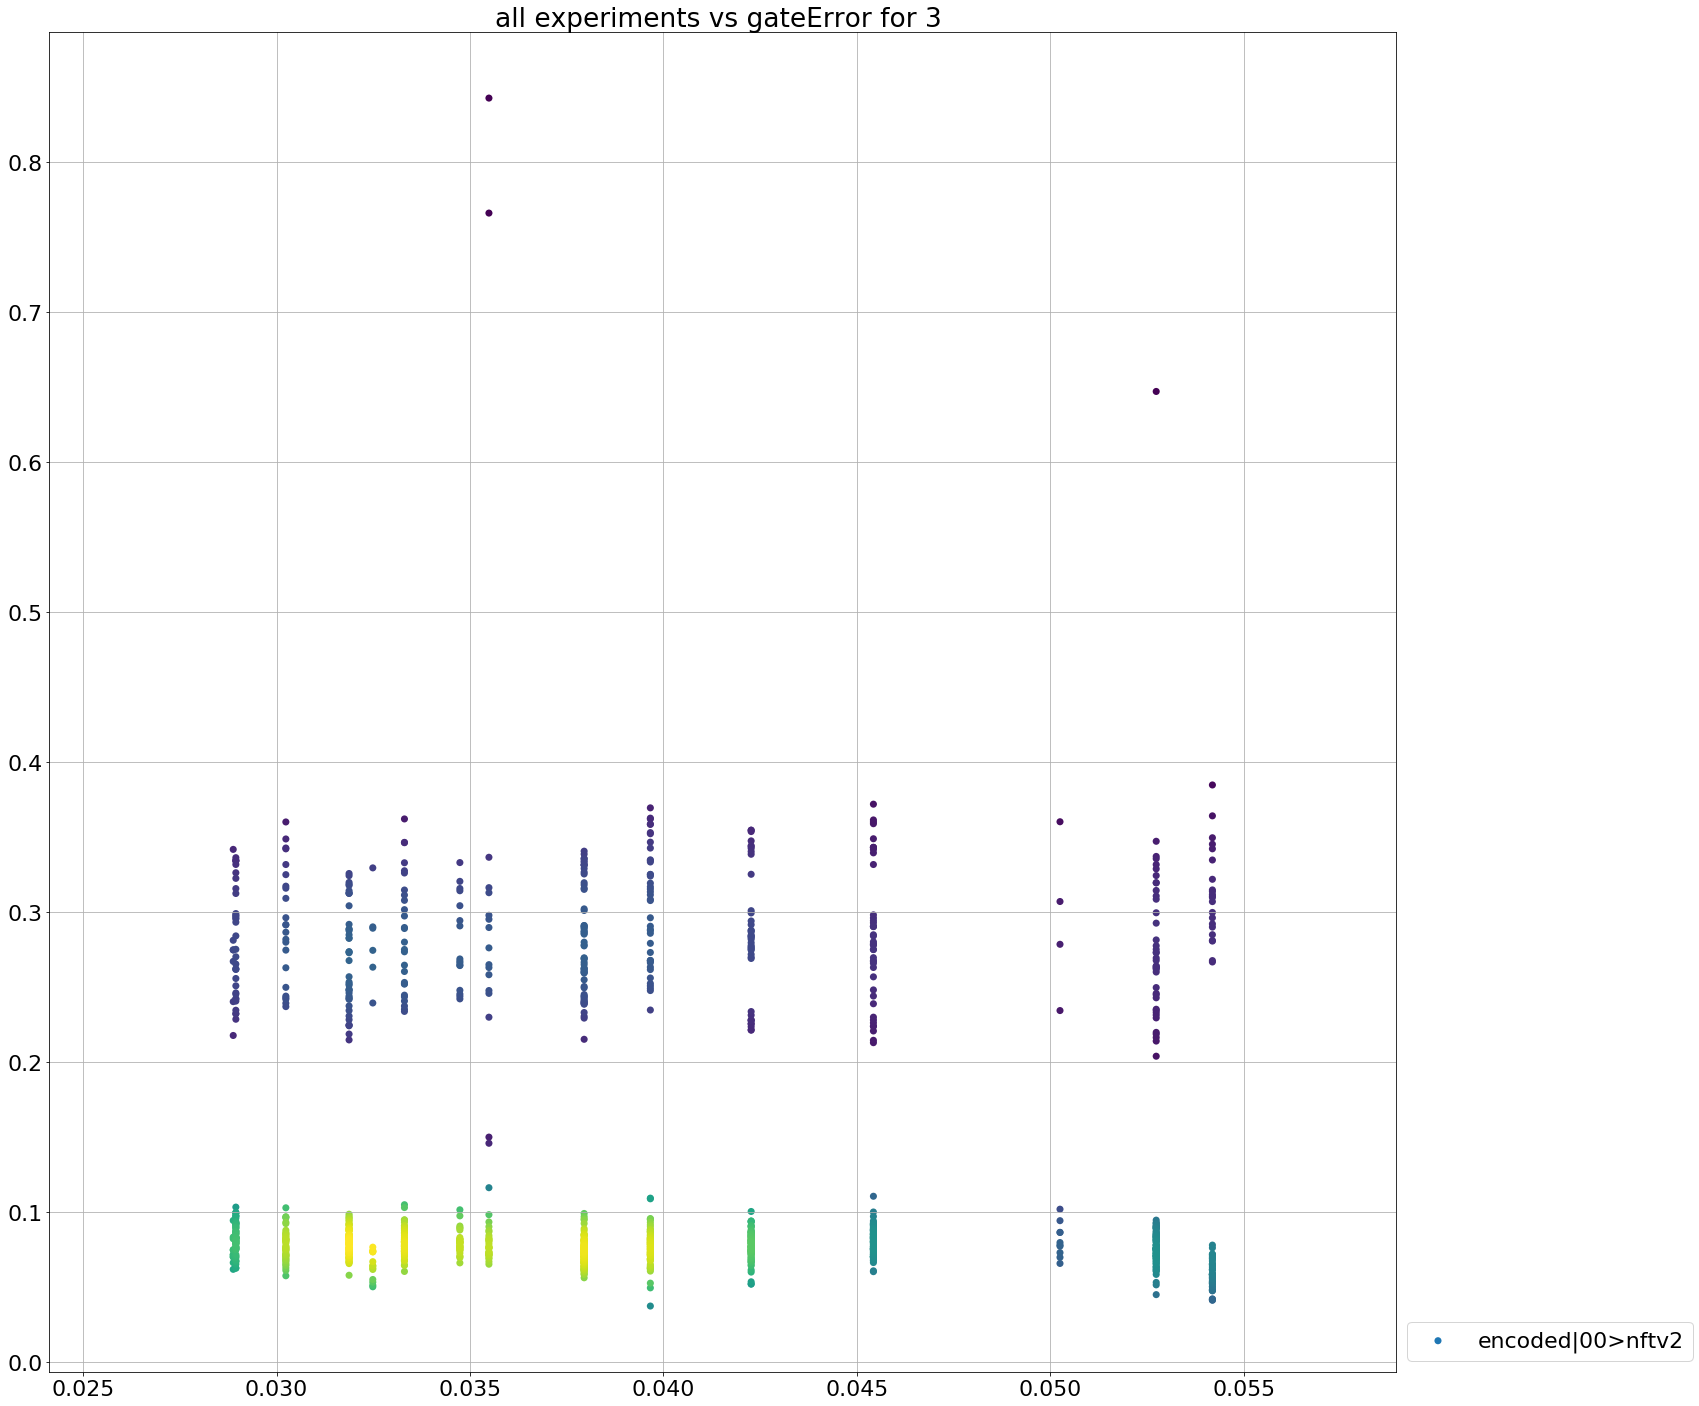

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [108]:
plottool.plot_everything_calib_data('data/Processed_data/', 3, 'gateError', 
                                    multi_qubit_param=True,
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.01,0.055], 
                                    y_range=[0,0.15],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [9]])

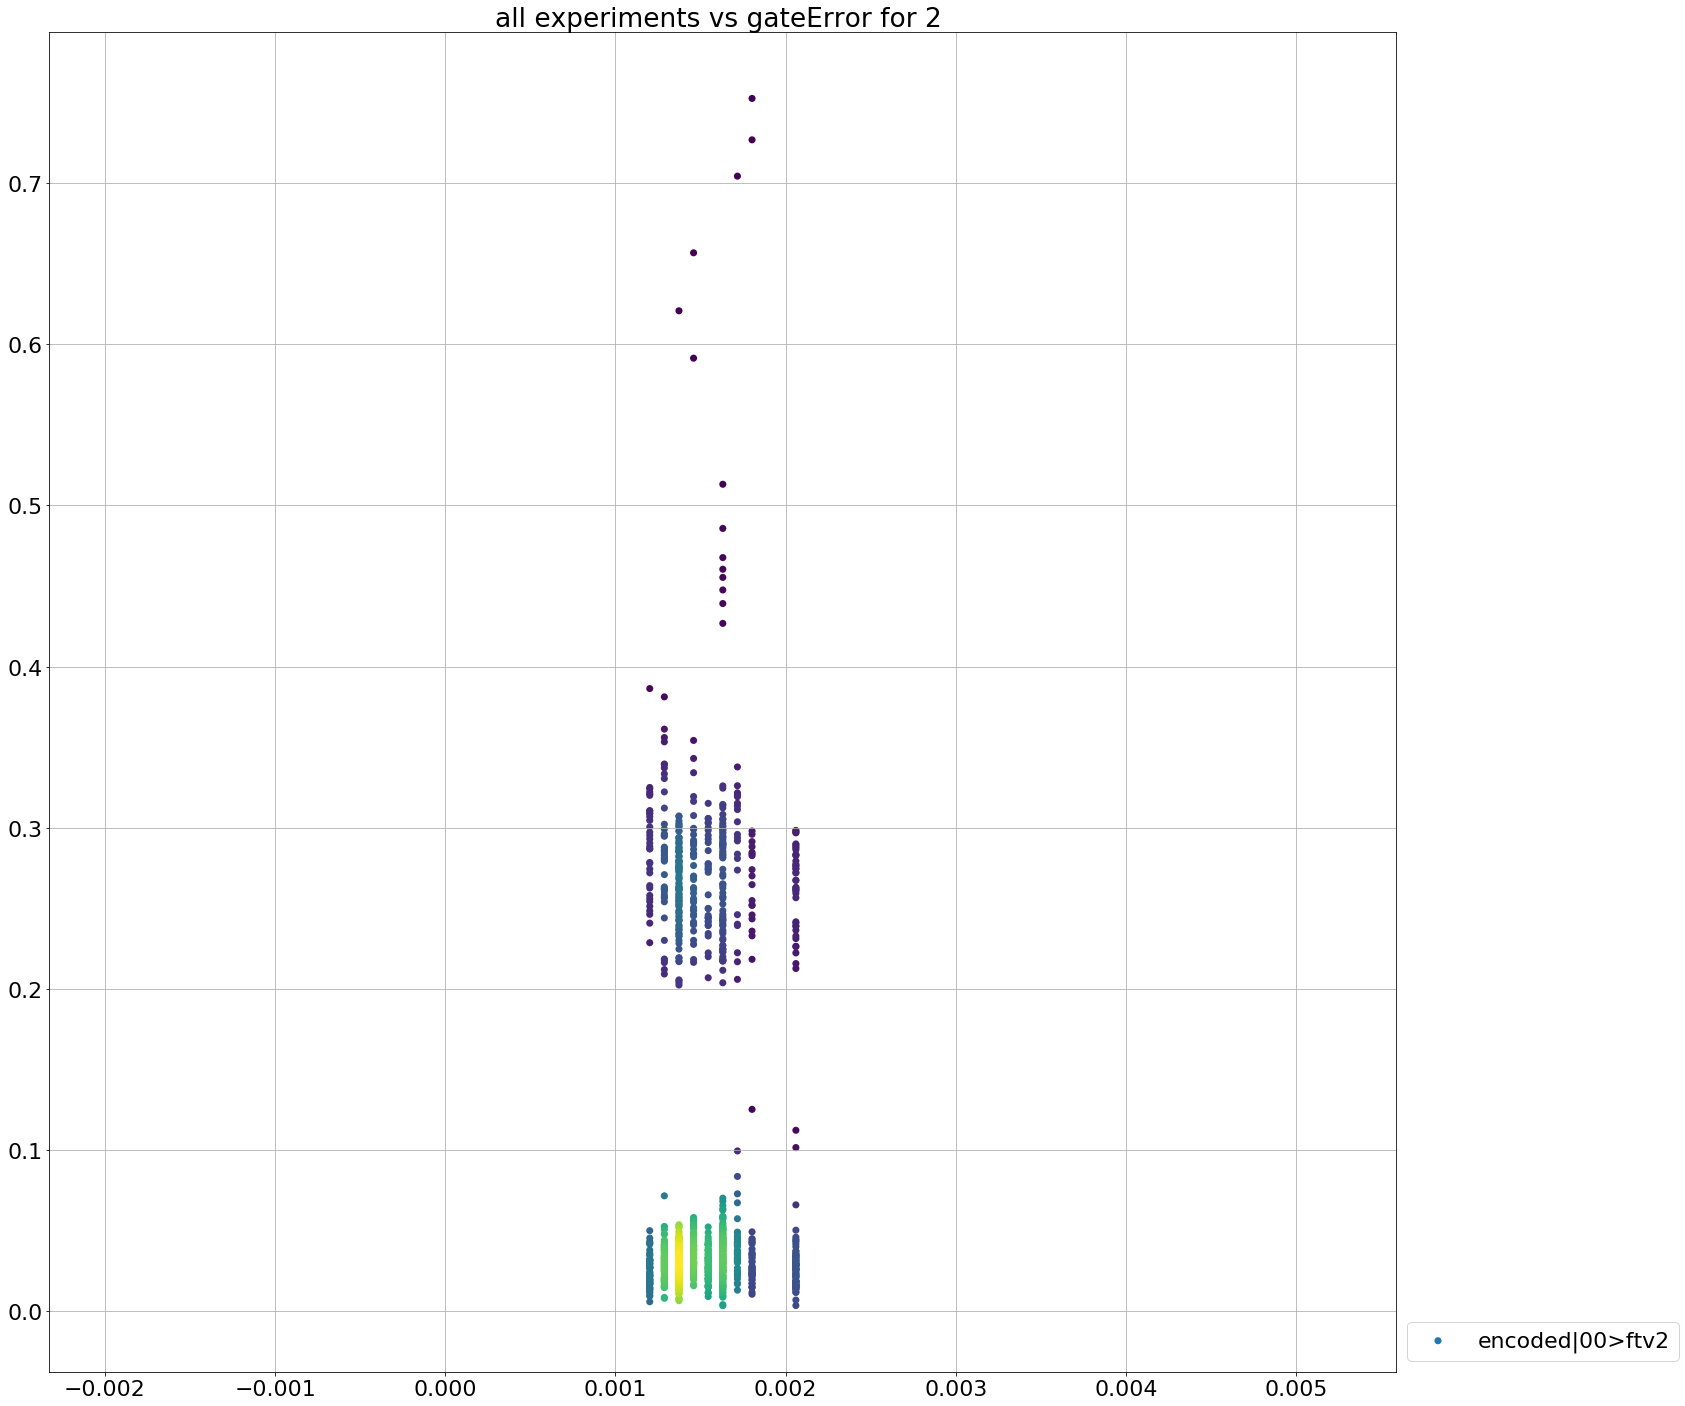

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [113]:
plottool.plot_everything_calib_data('data/Processed_data/', 2, 'gateError', 
                                    multi_qubit_param=False,
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.01,0.035], 
                                    y_range=[0,0.4],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [7]])

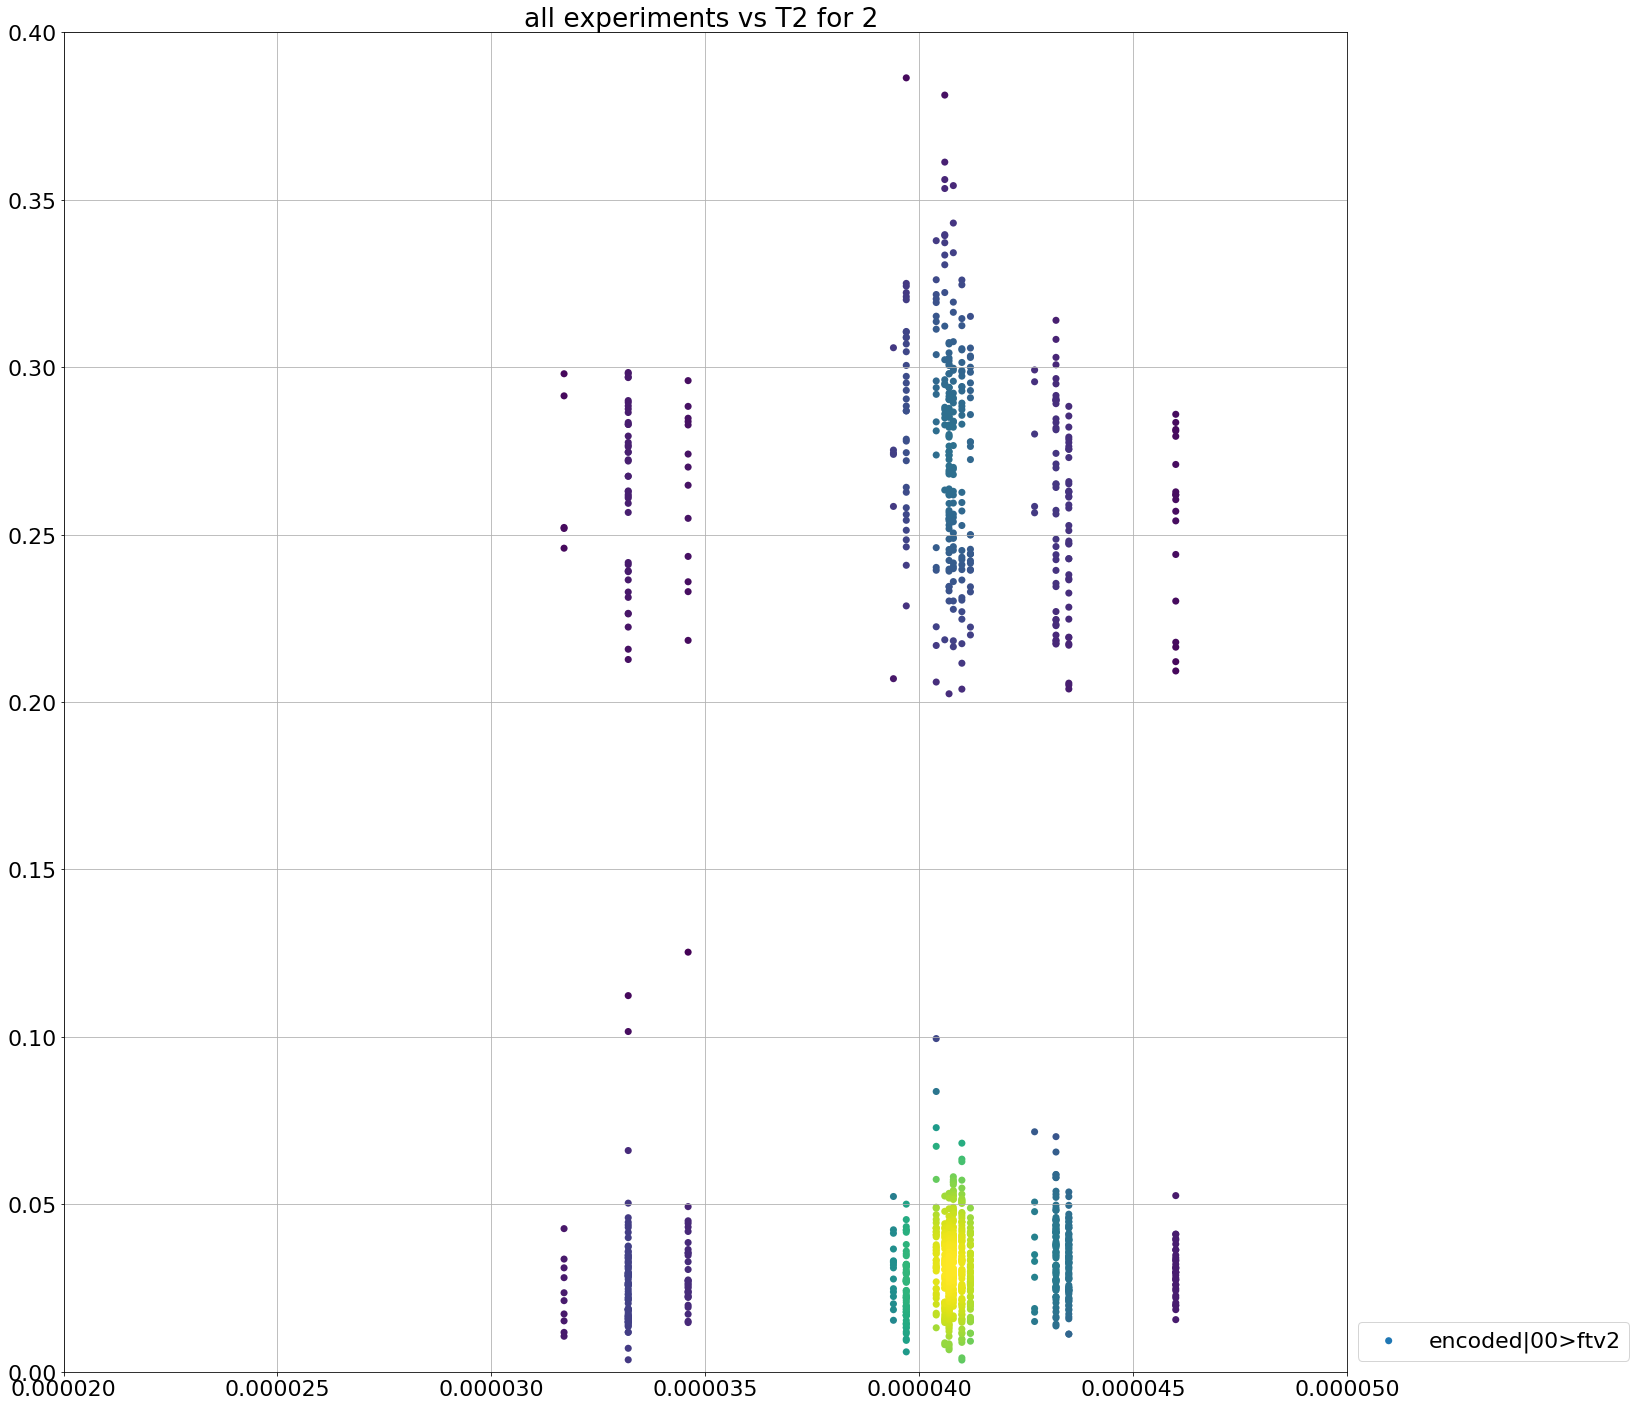

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [119]:
plottool.plot_everything_calib_data('data/Processed_data/', 2, 'T2', 
                                    multi_qubit_param=False,
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.00002,0.00005], 
                                    y_range=[0,0.4],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [7]])

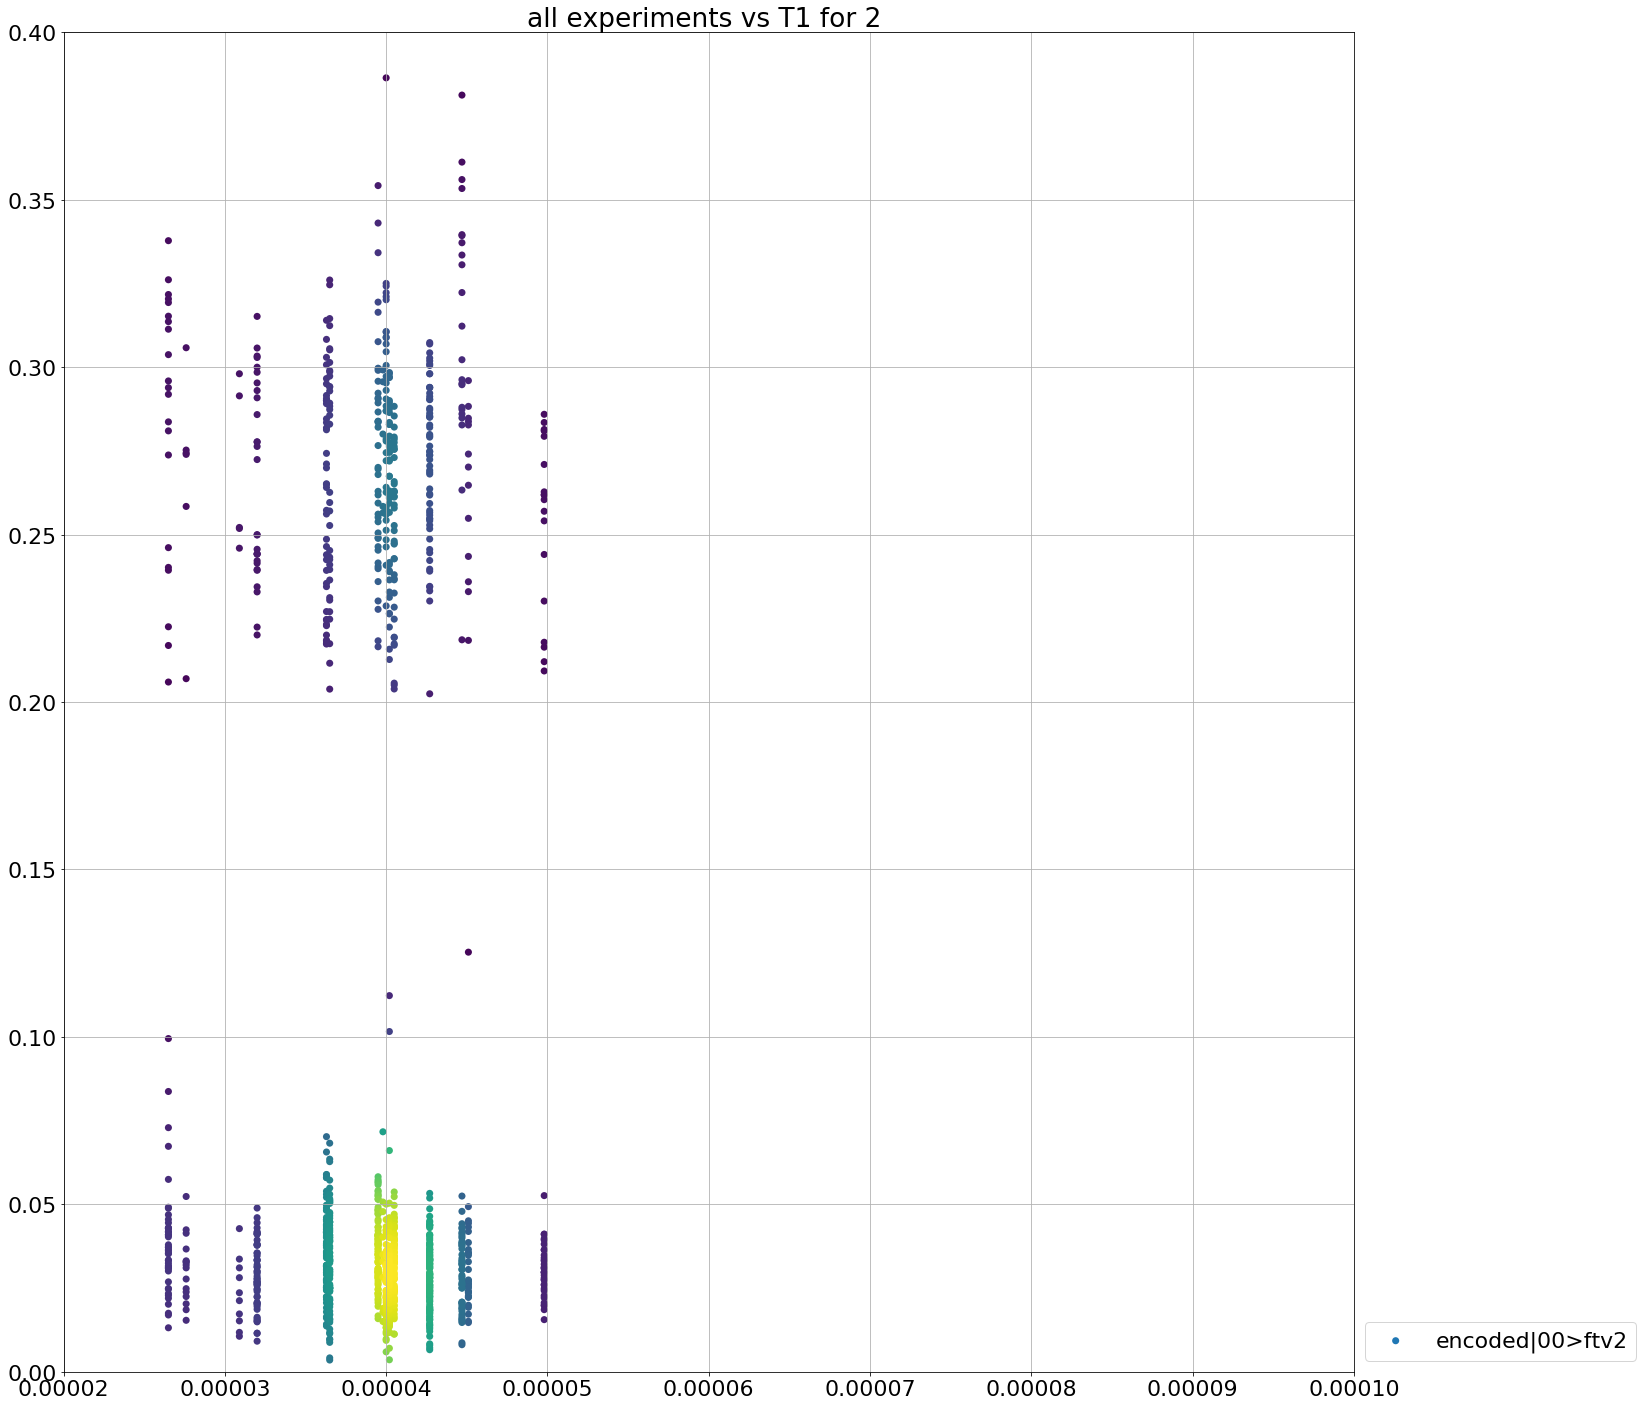

0 27398
bare[1, 0] 0.057210042596407676
bare[2, 0] 0.05058311544438844
bare[2, 1] 0.059090730673638826
bare[2, 4] 0.0608403631981383
bare[3, 2] 0.061699105618474685
bare[3, 4] 0.06880372206007973
encoded|00>ftv1 0.05582074628195924
encoded|00>ftv2 0.11393709344380022
encoded|00>nftv1 0.08152131850113092
encoded|00>nftv2 0.1467328867482615
encoded|0+> 0.03543286592703635
encoded|00>+|11> 0.02239111356440737


In [121]:
plottool.plot_everything_calib_data('data/Processed_data/', 2, 'T1', 
                                    multi_qubit_param=False,
                                    logscalex=False, 
                                    logscaley=False, 
                                    x_range=[0.00002,0.0001], 
                                    y_range=[0,0.4],
                                    sublabels=[plottool.PLOT_LABELS[i] for i in [7]])